In [184]:
!pip install pytrends

In [185]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-vpvc5hzr
  Running command git clone -q https://github.com/GeneralMills/pytrends /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-vpvc5hzr
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [186]:
import pandas as pd
from pytrends.request import TrendReq
import time
import datetime
from datetime import datetime, date, time

### Use pytrends to scrape google trends data - topic interests over the past 5 years

Pytrends documentation: https://pypi.org/project/pytrends/#interest-over-time

According to the Google Trends website <b>Interest over time (IOT)</b> = numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity of the term. A vlaue of 50 means that the term is half as popular. A score of 0 means there was not engouh data for this term. This 0 to 100 scale will be refered further as the trends index.

Each point represents the interest over time for a given week.

The region selected for the analysis is 'worldwide'.

Topic queried: 'Applied behaviour analysis'.
Date of query : 01/08/2023


In [187]:
# pytrend = TrendReq()
# time zone codes can be found: https://forbrains.co.uk/international_tools/earth_timezones
# setting the timezone to BST does not change the results
pytrend = TrendReq(hl='en-US', tz=60, retries=2, requests_args={'verify':False})

/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [188]:
# # this will return different results from the the website because:
# # https://stackoverflow.com/questions/59901790/why-is-data-downloaded-via-pytrends-drastically-different-from-using-the-google
# pytrend.build_payload(kw_list=['Applied behavior analysis'], timeframe='today 5-y', geo='')

# google trends uses FREEBASE ID for topic related searches. Applied Behavior Analysis FREEBAE ID = /m/05wf1w (https://www.wikidata.org/wiki/Q621607)
# geo='' means the region is set to 'worldwide' (see pytrends documentation cited above)
pytrend.build_payload(kw_list=['/m/05wf1w'], timeframe='today 5-y' , geo ='')

/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [189]:
pytrends_iot_df = pytrend.interest_over_time()
pytrends_iot_df.info()

/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2018-08-12 to 2023-07-30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   /m/05wf1w  260 non-null    int64
 1   isPartial  260 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 4.3 KB


In [190]:
pytrends_iot_df = pytrends_iot_df.rename(columns={"/m/05wf1w": "Applied behavior analysis"})
pytrends_iot_df.head()

,Applied behavior analysis,isPartial
date,,
2018-08-12,44,False
2018-08-19,45,False
2018-08-26,48,False
2018-09-02,46,False
2018-09-09,49,False


(0.0, 120.0)

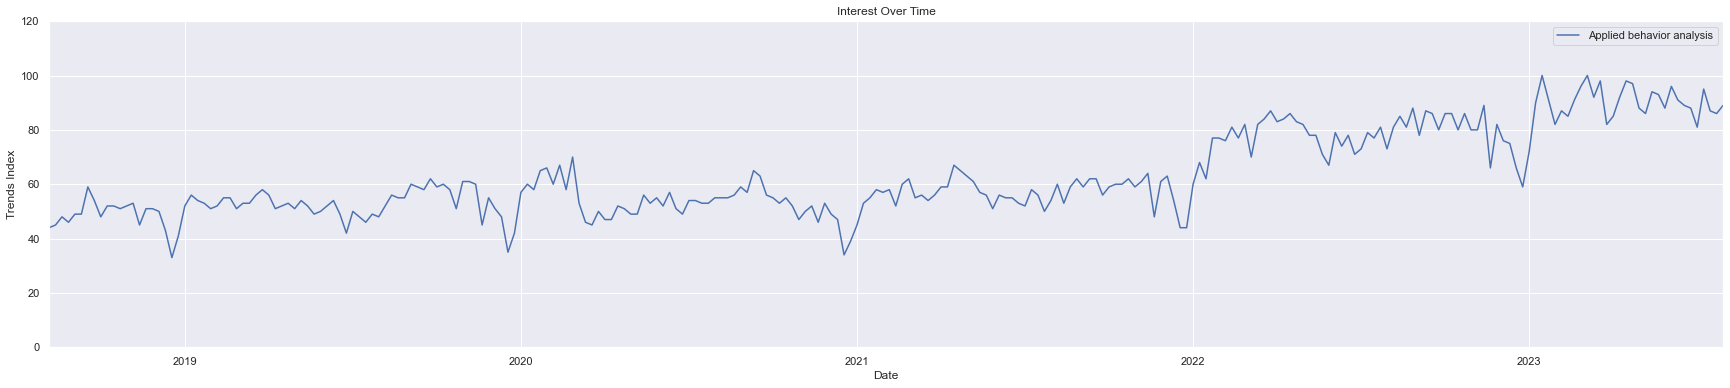

In [191]:
# visualise IOT
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes='true')
dx = pytrends_iot_df.plot.line(figsize= (30,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
# set the max y limit to 120 for better visualisation
plt.ylim(0, 120) 

### Use Google Trends website data - topic interest over the past 5 years
The following represents the same analysis as above except the data has been manually downloaded from Google's website (https://trends.google.com/trends/explore?date=today%205-y&q=%2Fm%2F05wf1w&hl=en)

Date of query : 01/08/2023

Timeframe: 5 years to date

Region: worldwide/global

Query:
* applied behavior analysis - topic 

In [192]:
# read the data
site_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_global/q_aba_topic_world_multiTimeline.csv')
site_df.head()

,Category: All categories
Week,Applied behavior analysis: (Worldwide)
2018-08-05,53
2018-08-12,49
2018-08-19,51
2018-08-26,57


In [193]:
# no missing data
site_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, Week to 2023-07-23
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  261 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [194]:
site_df.reset_index(inplace=True)
site_df.head()

,index,Category: All categories
0,Week,Applied behavior analysis: (Worldwide)
1,2018-08-05,53
2,2018-08-12,49
3,2018-08-19,51
4,2018-08-26,57


In [195]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     261 non-null    object
 1   Category: All categories  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [196]:
# rename the columns with the correct lables
site_df.columns = site_df.iloc[0]
site_df.head()

,Week,Applied behavior analysis: (Worldwide)
0,Week,Applied behavior analysis: (Worldwide)
1,2018-08-05,53
2,2018-08-12,49
3,2018-08-19,51
4,2018-08-26,57


In [197]:
# remove the first 2 rows on the data set - first row was an empty row and the second row contained the columns lables
site_df = site_df.tail(-1)
site_df.head()

,Week,Applied behavior analysis: (Worldwide)
1,2018-08-05,53
2,2018-08-12,49
3,2018-08-19,51
4,2018-08-26,57
5,2018-09-02,53


In [198]:
# trends index for Applied behavior analysis is stored as a string/object value
# week date is stored as a string/object value
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Week                                    260 non-null    object
 1   Applied behavior analysis: (Worldwide)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [199]:
# change type of Trends index for Applied behavior analysis from object to int
site_df = site_df.astype({'Applied behavior analysis: (Worldwide)':'int'})
# change the type of week date data from object to datetime
site_df['Week'] = pd.to_datetime(site_df['Week'])
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Week                                    260 non-null    datetime64[ns]
 1   Applied behavior analysis: (Worldwide)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

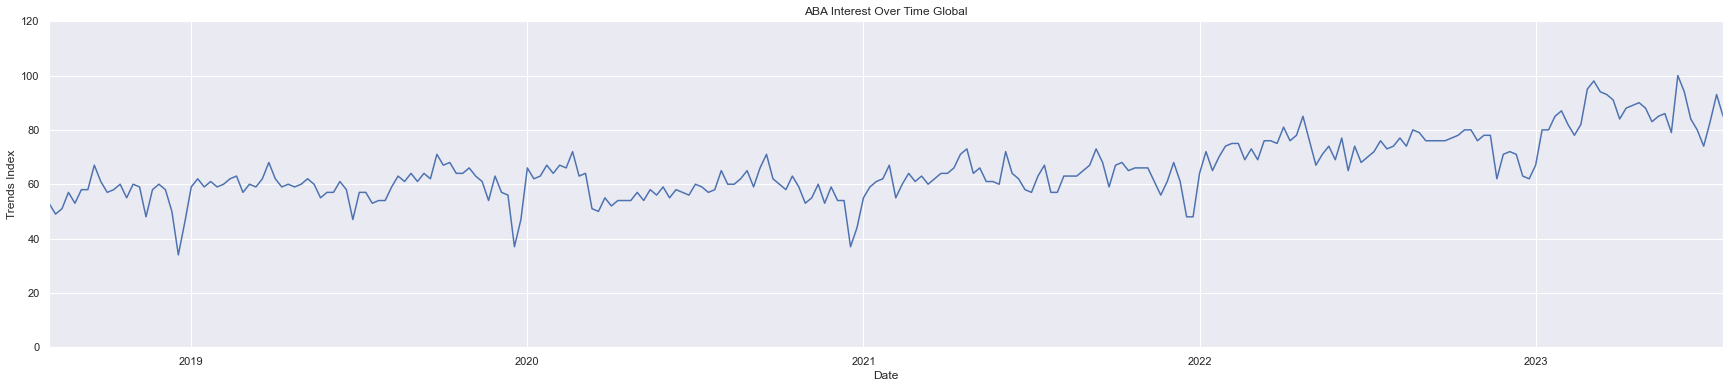

In [200]:
# visualize IOT
site_df = site_df.set_index(site_df['Week'])
dx = site_df['Applied behavior analysis: (Worldwide)'].plot.line(figsize=(30,6), title=("ABA Interest Over Time Global"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

The above code shows discrepancies between the data obtained via pytrends vs. via google's official website. I have failed to find the explanation for why this is the case - apparently the data proivded when making calls as legit-user vs scraper is different (https://stackoverflow.com/questions/73988220/why-google-retrieves-different-info-to-scrapers). Google Trends does not have an official API and thus reliability on 3rd party scraping tools can result in questionalble data. I have thus decided to manually download the data from google'e website direclty - the amount of data sets is small and thus this process is faster than to try to figure out a reliable and efficient method of scraping google trends data (this is out of the scope of the current project).

## Google trends data for queries related to the topic: Applied Behaviour Analysis

Date of query : 01/08/2023

Time frame: past 5 years

Query: Applied behaviour analysis - topic

Data sets obtained:
1. IOT worldwide - analysis provided above
2. Interest by region (Country) worldwide
3. Related topics - worldwide
4. Related queries - worldwide

5. IOT - UK
6. Interest by region (Country) UK
7. Related topics - UK
8. Related queries - UK

### Interest by region (Country) worldwide


In [201]:
# read file -> we observe there is missing data
ibr_world_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_global/q_aba_global_geoMap.csv')
ibr_world_df.head()

,Category: All categories
Country,Applied behavior analysis: (8/1/18 - 8/1/23)
Uganda,100
Cambodia,63
Nigeria,33
Cayman Islands,NaN


In [202]:
# reindex
ibr_world_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_world_df.columns = ibr_world_df.iloc[0]
ibr_world_df.head()

,Country,Applied behavior analysis: (8/1/18 - 8/1/23)
0,Country,Applied behavior analysis: (8/1/18 - 8/1/23)
1,Uganda,100
2,Cambodia,63
3,Nigeria,33
4,Cayman Islands,NaN


In [203]:
# remove first row
ibr_world_df = ibr_world_df.tail(-1)
ibr_world_df.head()

,Country,Applied behavior analysis: (8/1/18 - 8/1/23)
1,Uganda,100
2,Cambodia,63
3,Nigeria,33
4,Cayman Islands,NaN
5,United States,25


In [204]:
# check missing values 
ibr_world_df.isna().sum()

0
Country                                           0
Applied behavior analysis: (8/1/18 - 8/1/23)    197
dtype: int64

In [205]:
# 194 out of 250 rows have missing data
# missing data only for Applied behavior analysis: (8/1/18 - 8/1/23) column
# accodring to Google Trends: not engough interest to compute a value
print(f'Rows: {len(ibr_world_df)}')
ibr_world_df.info()

Rows: 250
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Country                                       250 non-null    object
 1   Applied behavior analysis: (8/1/18 - 8/1/23)  53 non-null     object
dtypes: object(2)
memory usage: 4.0+ KB


In [206]:
# replace missing data with 0 
# Google does not have sufficient data to compute trends, thus we can assume there is no interest
# set all NaN values to 0 (= no google trends data for that entry)
ibr_world_df['Applied behavior analysis: (8/1/18 - 8/1/23)'] = ibr_world_df['Applied behavior analysis: (8/1/18 - 8/1/23)'].fillna(0)
ibr_world_df.head()

,Country,Applied behavior analysis: (8/1/18 - 8/1/23)
1,Uganda,100
2,Cambodia,63
3,Nigeria,33
4,Cayman Islands,0
5,United States,25


In [207]:
ibr_world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Country                                       250 non-null    object
 1   Applied behavior analysis: (8/1/18 - 8/1/23)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [208]:
# change type of Trends index for Applied behavior analysis from object to int
ibr_world_df = ibr_world_df.astype({'Applied behavior analysis: (8/1/18 - 8/1/23)':'int'})
ibr_world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Country                                       250 non-null    object
 1   Applied behavior analysis: (8/1/18 - 8/1/23)  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [209]:
# sort countries/regions by trending index
ibr_world_df = ibr_world_df.sort_values(by=['Applied behavior analysis: (8/1/18 - 8/1/23)'], ascending=False)
ibr_world_df.head(20)

,Country,Applied behavior analysis: (8/1/18 - 8/1/23)
1,Uganda,100
2,Cambodia,63
3,Nigeria,33
5,United States,25
6,Ethiopia,22
9,Italy,12
10,Israel,12
11,Brazil,11
13,Canada,11
15,United Arab Emirates,10


Applied behavior analysis seems to be very popular in Uganda and many African countries.However, the data reflects queries related to the topic, not the search term, of Applied behavior analysis.
This means data reflects all possible related words, inculding misspellings and acronims. A brief investigation revealed that 2 popular companies in Uganda - one sports betting agency and one ofering financial services - have ABA in their name. This could be acounting for the incresed number of searches using the keyword 'aba' in Uganda.

Uganda 'ABA' companies: https://www.google.com/search?q=aba+uganda&oq=aba+uganda&aqs=chrome.0.69i59j46i175i199i512j0i22i30l2j0i10i22i30j0i22i30l2j69i60.3892j0j4&sourceid=chrome&ie=UTF-8

When a search in Google Trends was made for the search term 'Applied behavior analysis' (this shows just the exact match queries), USA appears to be the region where Applied behavior analysis trends the highest.

Google Trends data for 'Applied behavior analysis' as a search word:
https://trends.google.com/trends/explore?date=today%205-y&q=Applied%20behavior%20analysis&hl=en


Applied behavior analysis' popularity worldwide is not the topic of the current project so this issue will not be investigated further. Google trends data is used in the current project in order to find related key words to 'Applied behavior analysis' - > these are available in the *related queries* datasets. The related words are used to form a word bank of keywords for searching the relevant social media posts from the  Reddit platform. The selection on these keywords is done manually.


### Related topics - worldwide

Accodring to Google Trends website Related topics means:

Users searching for your term also searched for these topics. You can view by the following metrics:
* Top - The most popular topics. Scoring is on a relative scale where a value of 100 is the most commonly searched topic and a value of 50 is a topic searched half as often as the most popular term, and so on.

* Rising - Related topics with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these topics are new and had few (if any) prior searches.

In [210]:
# upload data
# data is formated strangely -> see possible sollutions at https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
rt_world_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_global/q_aba_topic_global_relatedEntities.csv', skiprows=2)
rt_world_df

,TOP
Therapy,100
Behavior,90
Analysis,55
Autistic Spectrum Disorders,24
Licensed behavior analyst,10
Master's Degree,10
Training,9
Course,9
Psychology,9
Applied science,6


There is no missing data. RISING appears as NaN , however this is the title of the second part of the dataset - the data set will be split in 2: TOP searches and Rising searches.

In [211]:
# select top 25 related topics (maximum Google Trends provided)
rt_world_df_top = rt_world_df.iloc[:25]
rt_world_df_top = rt_world_df_top.reset_index()
rt_world_df_top = rt_world_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_world_df_top.head()

,Top related topic World,Trend index
0,Therapy,100
1,Behavior,90
2,Analysis,55
3,Autistic Spectrum Disorders,24
4,Licensed behavior analyst,10


In [212]:
# select rising related topics
rt_world_df_rising = rt_world_df.iloc[25:]
rt_world_df_rising = rt_world_df_rising.reset_index()
rt_world_df_rising = rt_world_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_world_df_rising = rt_world_df_rising.tail(-1)
rt_world_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,Functional behavior assessment,Breakout
3,Applied science,"+2,400%"
4,Postgraduate education,+200%
5,Continuous function,+180%


The data above shows Applied behaviour analysis is commonly related to Therapy and Autistic Spectrum Disorders (see TOP: rt_world_df_top).

It seems that recently there has been a high increase in queries on Autism and Applied behaviour analysis (see RISING: rt_world_df_rising)

### Related queries - worldwide

Accodring to Google Trends website Related queries means:

Users searching for your term also searched for these queries. You can sort by the following metrics:
* Top - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

* Rising - Queries with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these queries are new and had few (if any) prior searches.



In [213]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_world_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_global/q_aba_topic_global_relatedQueries.csv', skiprows=2)
rq_world_df

,TOP
aba,100
aba therapy,21
behavior analysis,9
autism,6
applied behavior analysis,6
what is aba,6
aba autism,5
aba behavior,5
behavior analyst,4
aba therapist,3


In [214]:
# select the top related queries/words
rq_world_df_top = rq_world_df.iloc[:25]
rq_world_df_top = rq_world_df_top.reset_index()
rq_world_df_top.head()

,index,TOP
0,aba,100
1,aba therapy,21
2,behavior analysis,9
3,autism,6
4,applied behavior analysis,6


In [215]:
# rename the columns appropriately
rq_world_df_top = rq_world_df_top.rename(columns={"index": "World Top related query word", "TOP": "Trend index"})
rq_world_df_top.head()

,World Top related query word,Trend index
0,aba,100
1,aba therapy,21
2,behavior analysis,9
3,autism,6
4,applied behavior analysis,6


In [216]:
# select the rising related queries/words
rq_world_df_rising = rq_world_df.iloc[25:]
rq_world_df_rising = rq_world_df_rising.reset_index()
rq_world_df_rising.head()

,index,TOP
0,RISING,NaN
1,ababet ug,Breakout
2,aba roblox,"+4,800%"
3,ababet,"+4,400%"
4,father of behaviorism,"+3,500%"


In [217]:
# rename the columns appropriately
rq_world_df_rising = rq_world_df_rising.rename(columns={"index": "World Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_world_df_rising = rq_world_df_rising.tail(-1)
rq_world_df_rising.head()

,World Rising related query word,search increase
1,ababet ug,Breakout
2,aba roblox,"+4,800%"
3,ababet,"+4,400%"
4,father of behaviorism,"+3,500%"
5,golden steps aba,"+3,500%"


The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Applied behavior anlysis'.

The 2 data bases representig global data:
- rq_world_df_rising
- rq_world_df_top

### IOT - UK

In [218]:
# read uk data
iot_uk_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_uk/q_aba_topic_uk_multiTimeline.csv')
iot_uk_df.head()

,Category: All categories
Week,Applied behavior analysis: (United Kingdom)
2018-08-05,37
2018-08-12,44
2018-08-19,40
2018-08-26,28


In [219]:
# reset index
iot_uk_df = iot_uk_df.reset_index()
# rename the columns with the correct lables
iot_uk_df.columns = iot_uk_df.iloc[0]
# remove row containing lables
iot_uk_df = iot_uk_df.tail(-1)
iot_uk_df.head()

,Week,Applied behavior analysis: (United Kingdom)
1,2018-08-05,37
2,2018-08-12,44
3,2018-08-19,40
4,2018-08-26,28
5,2018-09-02,50


In [220]:
# no missing data / null values
iot_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Week                                         260 non-null    object
 1   Applied behavior analysis: (United Kingdom)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [221]:
# change Applied behavior analysis: (United Kingdom) type from object to int
iot_uk_df['Applied behavior analysis: (United Kingdom)'] = pd.to_numeric(iot_uk_df['Applied behavior analysis: (United Kingdom)'])
# change week type to datetime
iot_uk_df['Week'] = pd.to_datetime(iot_uk_df['Week'])
iot_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Week                                         260 non-null    datetime64[ns]
 1   Applied behavior analysis: (United Kingdom)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

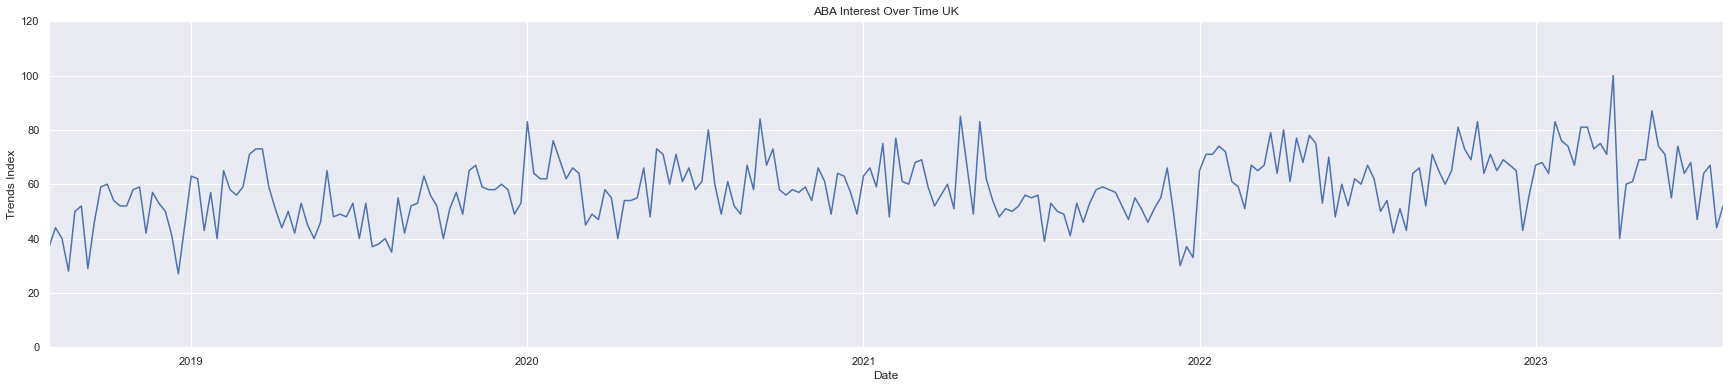

In [222]:
# visualize IOT
iot_uk_df = iot_uk_df.set_index(iot_uk_df['Week'])
dx = iot_uk_df['Applied behavior analysis: (United Kingdom)'].plot.line(figsize=(30,6), title=("ABA Interest Over Time UK"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

### Interest by region (Country) UK

In [223]:
ibr_uk_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_uk/q_aba_topic_uk_geoMap.csv')
# rename the columns with the correct lables
ibr_uk_df.columns = ibr_uk_df.iloc[0]
# remove row containing lables
ibr_uk_df = ibr_uk_df.tail(-1)
ibr_uk_df.head()

Region,Applied behavior analysis: (8/1/18 - 8/1/23)
Wales,100
Northern Ireland,90
England,68
Scotland,52


In UK, applied behavior analysis seems to be most popular in Wales, and less so in Scotland.

### Related topics - UK

In [224]:
rt_uk_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_uk/q_aba_topic_uk_relatedEntities.csv', skiprows=2)
rt_uk_df

,TOP
Therapy,100
Behavior,89
Analysis,70
Autistic Spectrum Disorders,33
coach,17
Training,12
Course,10
Applied science,9
Master's Degree,8
Psychology,7


In [225]:
# no missing values
# Rising is a title not a null data entry (see previous explanation)
# select top 25 related topics (maximum Google Trends provided)
rt_uk_df_top = rt_uk_df.iloc[:25]
rt_uk_df_top = rt_uk_df_top.reset_index()
rt_uk_df_top = rt_uk_df_top.rename(columns={"index": "Top related topic UK", "TOP": "Trend index"})
rt_uk_df_top.head()

,Top related topic UK,Trend index
0,Therapy,100
1,Behavior,89
2,Analysis,70
3,Autistic Spectrum Disorders,33
4,coach,17


In [226]:
# select rising 25 related topics (maximum Google Trends provided)
rt_uk_df_rising = rt_uk_df.iloc[25:]
rt_uk_df_rising = rt_uk_df_rising.reset_index()
rt_uk_df_rising = rt_uk_df_rising.rename(columns={"index": "Rising related risingic UK", "TOP": "Trend index"})
rt_uk_df_rising = rt_uk_df_rising.tail(-1)
rt_uk_df_rising.head()

,Rising related risingic UK,Trend index
1,Autism,Breakout
2,harmful,Breakout
3,Graduate certificate,Breakout
4,Applied science,Breakout
5,Autistic child,"+1,000%"


In UK, same as globally, ABA, as a topic, is related to Therapy and Autistic Spectrum Disorders (see TOP: rt_uk_df_top).

Similarly to the global data, UK data shows that recently there has been a high increase in queries on Autism and Applied behaviour analysis. In contrast to the global queries, in UK there is also a very high rise in queries about Applied behaviour analysis and the 'harmful' topic (see RISING: rt_world_df_rising). This suggests that in UK people are increasingly concerned about ABA having harmful, negative consequences/effects. 

### Related queries - UK

In [227]:

# read data
rq_uk_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_topic_uk/q_aba_topic_uk_relatedQueries.csv', skiprows=2)
# no missing values
# Rising is a title not a null data entry (see previous explanation)
rq_uk_df

,TOP
aba,100
aba therapy,26
autism,12
autism aba,11
behaviour,10
behaviour analysis,9
what is aba,7
applied behavior analysis,6
aba tutor,5
applied behaviour analysis,4


In [228]:
# select top 25 related queries/words ( this is the maximum Google Trends provided)
rq_uk_df_top = rq_uk_df.iloc[:25]
rq_uk_df_top = rq_uk_df_top.reset_index()
rq_uk_df_top.head()

,index,TOP
0,aba,100
1,aba therapy,26
2,autism,12
3,autism aba,11
4,behaviour,10


In [229]:
# rename the columns appropriately
rq_uk_df_top = rq_uk_df_top.rename(columns={"index": "UK Top related query word", "TOP": "Trend index"})
rq_uk_df_top.head()

,UK Top related query word,Trend index
0,aba,100
1,aba therapy,26
2,autism,12
3,autism aba,11
4,behaviour,10


In [230]:
# select the rising related queries/words
rq_uk_df_rising = rq_uk_df.iloc[25:]
rq_uk_df_rising = rq_uk_df_rising.reset_index()
rq_uk_df_rising.head()

,index,TOP
0,RISING,NaN
1,aba remote jobs,Breakout
2,ababet,Breakout
3,ababet ug,Breakout
4,halfords retail notes,Breakout


In [231]:
# rename the columns appropriately
rq_uk_df_rising = rq_uk_df_rising.rename(columns={"index": "UK Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_uk_df_rising = rq_uk_df_rising.tail(-1)
rq_uk_df_rising.head()

,UK Rising related query word,search increase
1,aba remote jobs,Breakout
2,ababet,Breakout
3,ababet ug,Breakout
4,halfords retail notes,Breakout
5,what is stimming,Breakout


The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Applied behavior anlysis'. This word bank will be combined with the one obtained from global searches - any duplcates and irrelevant words/phrases ( for example, the ones related to sports bets and financial services - see Uganda discussion above) will be removed. The word bank thus created will be used to match relevant social media posts from the social media platform Reddit.

The 2 data bases representig UK data:
- rq_uk_df_rising
- rq_uk_df_top

Bellon-Harn et al. (2022) and Whisenhunt et al. (2023) used the keywords “Applied Behavior Analysis” and “ABA Therapy” to from a list of  query words related to ABA. I will also thus, query the google trends data using the search term 'aba therapy' - this query is done only at the global level, as the American and English spelling of the keywords is the same (no need to query the UK data separately as this project does not aim to compare the 2 countries).

### Google trends data for ABA therapy
Date: 1/08/2023

Region: worldwide / global

Timeframe: past 5 years to date

Query: ABA therapy - search term (only google trends option)

Data sets obtained for each query:
1. IOT worldwide
2. Interest by region (Country) worldwide
3. Related topics - worldwide
4. Related queries - worldwide

### ABA therapy - search term - Google trends data

#### IOT worldwide

In [366]:
# read data
iot_aba_therapy_search_term_global_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_therapy_search_term_global/q_aba_therapy_search_term_global_multiTimeline.csv')
iot_aba_therapy_search_term_global_df.head()

,Category: All categories
Week,aba therapy: (Worldwide)
2018-08-05,46
2018-08-12,40
2018-08-19,45
2018-08-26,45


In [367]:
# reset index
iot_aba_therapy_search_term_global_df = iot_aba_therapy_search_term_global_df.reset_index()
# rename the columns with the correct lables
iot_aba_therapy_search_term_global_df.columns = iot_aba_therapy_search_term_global_df.iloc[0]
# remove row containing lables
iot_aba_therapy_search_term_global_df = iot_aba_therapy_search_term_global_df.tail(-1)
iot_aba_therapy_search_term_global_df.head()

,Week,aba therapy: (Worldwide)
1,2018-08-05,46
2,2018-08-12,40
3,2018-08-19,45
4,2018-08-26,45
5,2018-09-02,40


In [368]:
# no missing data / null values
iot_aba_therapy_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 1 to 261
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Week                      261 non-null    object
 1   aba therapy: (Worldwide)  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [369]:
# change aba therapy: (Worldwide) type from object to int
iot_aba_therapy_search_term_global_df['aba therapy: (Worldwide)'] = pd.to_numeric(iot_aba_therapy_search_term_global_df['aba therapy: (Worldwide)'])
# change week type to datetime
iot_aba_therapy_search_term_global_df['Week'] = pd.to_datetime(iot_aba_therapy_search_term_global_df['Week'])
iot_aba_therapy_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 1 to 261
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Week                      261 non-null    datetime64[ns]
 1   aba therapy: (Worldwide)  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

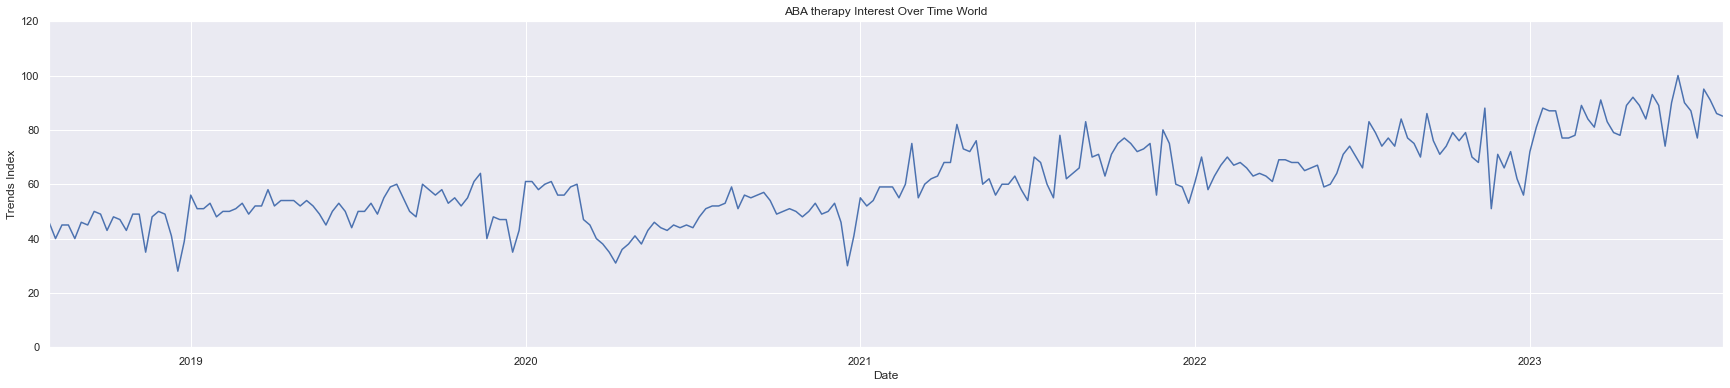

In [370]:
# visualize IOT
iot_aba_therapy_search_term_global_df = iot_aba_therapy_search_term_global_df.set_index(iot_aba_therapy_search_term_global_df['Week'])
dx = iot_aba_therapy_search_term_global_df['aba therapy: (Worldwide)'].plot.line(figsize=(30,6), title=("ABA therapy Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

#### Interest by region (Country) worldwide (ABA therapy - search term)

In [371]:
ibr_aba_therapy_search_term_global_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_therapy_search_term_global/q_aba_therapy_search_term_global_geoMap.csv')
# reindex
ibr_aba_therapy_search_term_global_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_aba_therapy_search_term_global_df.columns = ibr_aba_therapy_search_term_global_df.iloc[0]
# remove row containing lables
ibr_aba_therapy_search_term_global_df = ibr_aba_therapy_search_term_global_df.tail(-1)
ibr_aba_therapy_search_term_global_df.head(10)

,Country,aba therapy: (8/1/18 - 8/1/23)
1,United States,100
2,St. Helena,NaN
3,United Arab Emirates,37
4,Canada,35
5,Laos,NaN
6,Lebanon,NaN
7,Australia,27
8,Singapore,22
9,Iraq,21
10,Ireland,20


In [372]:
# we observe missing values
# check missing values 
ibr_aba_therapy_search_term_global_df.isna().sum()

0
Country                             0
aba therapy: (8/1/18 - 8/1/23)    216
dtype: int64

In [373]:
# there are 216 entries with NaN values 
# there is not enough data to compute the interest
# the NaN will be replaced with 0 ( consider no interest )
ibr_aba_therapy_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country                         250 non-null    object
 1   aba therapy: (8/1/18 - 8/1/23)  34 non-null     object
dtypes: object(2)
memory usage: 4.0+ KB


In [375]:
ibr_aba_therapy_search_term_global_df['aba therapy: (8/1/18 - 8/1/23)'] = ibr_aba_therapy_search_term_global_df['aba therapy: (8/1/18 - 8/1/23)'].fillna(0)
ibr_aba_therapy_search_term_global_df.head(10)

,Country,aba therapy: (8/1/18 - 8/1/23)
1,United States,100
2,St. Helena,0
3,United Arab Emirates,37
4,Canada,35
5,Laos,0
6,Lebanon,0
7,Australia,27
8,Singapore,22
9,Iraq,21
10,Ireland,20


In [376]:
ibr_aba_therapy_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country                         250 non-null    object
 1   aba therapy: (8/1/18 - 8/1/23)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [377]:
# change type of Trends index for aba therapy from object to int
ibr_aba_therapy_search_term_global_df = ibr_aba_therapy_search_term_global_df.astype({'aba therapy: (8/1/18 - 8/1/23)':'int'})
ibr_aba_therapy_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country                         250 non-null    object
 1   aba therapy: (8/1/18 - 8/1/23)  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [379]:
# sort countries/regions by trending index
ibr_aba_therapy_search_term_global_df = ibr_aba_therapy_search_term_global_df.sort_values(by=['aba therapy: (8/1/18 - 8/1/23)'], ascending=False)
ibr_aba_therapy_search_term_global_df.head(30)

,Country,aba therapy: (8/1/18 - 8/1/23)
1,United States,100
3,United Arab Emirates,37
4,Canada,35
7,Australia,27
8,Singapore,22
9,Iraq,21
10,Ireland,20
12,Philippines,18
13,Hong Kong,16
14,Pakistan,14


Globally most searches about ABA therapy are done in USA - this is to be expected as in USA ABA therapy is a thrapy covered by insurance, and the official ABA accrediting body (BACB) is originated and operates here.

#### Related topics ABA therapy - seearch term, Worldwide

In [381]:
# read data
rt_aba_therapy_search_term_global_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_therapy_search_term_global/q_aba_therapy_search_term_global_relatedEntities.csv', skiprows=2)
rt_aba_therapy_search_term_global_df

,TOP
Therapy,100
Applied behavior analysis,97
Autistic Spectrum Disorders,9
Behavior,6
Texas,3
Behavior therapy,2
Speech,2
Occupational Therapy,1
Speech–language pathology,1
Training,1


There is no missing data. RISING appears as NaN , however this is the title of the second part of the dataset - the data set will be split in 2: TOP searches and Rising searches.

In [382]:
# select top 25 related topics (maximum Google Trends provided)
rt_aba_therapy_search_term_global_df_top = rt_aba_therapy_search_term_global_df.iloc[:25]
rt_aba_therapy_search_term_global_df_top = rt_aba_therapy_search_term_global_df_top.reset_index()
rt_aba_therapy_search_term_global_df_top = rt_aba_therapy_search_term_global_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_aba_therapy_search_term_global_df_top.head()

,Top related topic World,Trend index
0,Therapy,100
1,Applied behavior analysis,97
2,Autistic Spectrum Disorders,9
3,Behavior,6
4,Texas,3


In [383]:
# select rising related topics
rt_aba_therapy_search_term_global_df_rising = rt_aba_therapy_search_term_global_df.iloc[25:]
rt_aba_therapy_search_term_global_df_rising = rt_aba_therapy_search_term_global_df_rising.reset_index()
rt_aba_therapy_search_term_global_df_rising = rt_aba_therapy_search_term_global_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_aba_therapy_search_term_global_df_rising = rt_aba_therapy_search_term_global_df_rising.tail(-1)
rt_aba_therapy_search_term_global_df_rising.head()

,Rising related topic World,Trend index
1,Cigna,Breakout
2,Autism Speaks,Breakout
3,Autism,Breakout
4,Autistic child,"+1,000%"
5,harmful,+750%


The data above shows that, globally, ABA therapy queries are related with topics like Applied behavior analysis and Autism. 

Cinga - heatlh insurance company -> people are increasingly looking for insurance coverage of ABA therapy. 

Also worth noting that ABA thrapy seems to be increasingly related ( in terms of online searches) to the topic *harmful*, indicating the people are increasingly concerned about the possible harmful effects of this type of therapy.

#### Related queries - ABA therapy, search term - worldwide

In [384]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_aba_therapy_search_term_global_df = pd.read_csv('google trends wordbank/aba_wordbank/q_aba_therapy_search_term_global/q_aba_therapy_search_term_global_relatedQueries.csv', skiprows=2)
rq_aba_therapy_search_term_global_df

,TOP
autism aba therapy,100
autism therapy,98
aba autism,97
autism,91
aba therapy near me,74
aba near me,69
what is aba,63
what is aba therapy,62
aba therapy for autism,41
therapy for autism,41


In [385]:
 # select the top related queries/words
rq_aba_therapy_search_term_global_df_top = rq_aba_therapy_search_term_global_df.iloc[:25]
rq_aba_therapy_search_term_global_df_top.reset_index(inplace=True)
rq_aba_therapy_search_term_global_df_top.head()

,index,TOP
0,autism aba therapy,100
1,autism therapy,98
2,aba autism,97
3,autism,91
4,aba therapy near me,74


In [386]:
# rename the columns appropriately
rq_aba_therapy_search_term_global_df_top = rq_aba_therapy_search_term_global_df_top.rename(columns={"index": "World Top related query word", "TOP": "Trend index"})
rq_aba_therapy_search_term_global_df_top.head()

,World Top related query word,Trend index
0,autism aba therapy,100
1,autism therapy,98
2,aba autism,97
3,autism,91
4,aba therapy near me,74


In [387]:
# select the rising related queries/words
rq_aba_therapy_search_term_global_df_rising = rq_aba_therapy_search_term_global_df.iloc[25:]
rq_aba_therapy_search_term_global_df_rising = rq_aba_therapy_search_term_global_df_rising.reset_index()
rq_aba_therapy_search_term_global_df_rising.head()

,index,TOP
0,RISING,NaN
1,aba therapy horror stories,Breakout
2,attain aba therapy,Breakout
3,aba therapy full form,Breakout
4,achievements aba therapy,Breakout


In [388]:
# rename the columns appropriately
rq_aba_therapy_search_term_global_df_rising = rq_aba_therapy_search_term_global_df_rising.rename(columns={"index": "World Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_aba_therapy_search_term_global_df_rising = rq_aba_therapy_search_term_global_df_rising.tail(-1)
rq_aba_therapy_search_term_global_df_rising.head()

,World Rising related query word,search increase
1,aba therapy horror stories,Breakout
2,attain aba therapy,Breakout
3,aba therapy full form,Breakout
4,achievements aba therapy,Breakout
5,illuminate aba therapy,Breakout


The 2 data frames created above will be used as a word bank for related query words related to search term 'ABA Therapy'.

The 2 data bases representig global data:
- rq_aba_therapy_search_term_global_df_rising
- rq_aba_therapy_search_term_global_df_top

### Google trends data for Autism and Autistic Spectrum disorder
Date: 1/08/2023

Region: worldwide / global

Timeframe: past 5 years to date

Query: 

    * autism - search term 
    * autism - condition -> data not included in the present analysis as google only shows data from 2022
    * autistic spectrum disorder - search term
    * autistic spectrum disorders - disorder


## Google trends data for queries related to Autism and Autistic spectrum disorder

Date of query : 01/08/2023

Time frame: past 5 years

Queries: 
- Autistic spectrum disorder - disorder
- Autistic spectrum disorder - search term
- Autism - search term 

Data sets obtained for each query:
1. IOT worldwide
2. Interest by region (Country) worldwide
3. Related topics - worldwide
4. Related queries - worldwide

5. IOT - UK
6. Interest by region (Country) UK
7. Related topics - UK
8. Related queries - UK

### Autistic speactrum disorder - disorder - Google trends data

#### IOT worldwide

In [232]:
# read data
iot_asd_disorder_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_global/q_asd_disorder_global_multiTimeline.csv')
iot_asd_disorder_global_df.head()

,Category: All categories
Week,Autistic Spectrum Disorders: (Worldwide)
2018-08-05,16
2018-08-12,17
2018-08-19,18
2018-08-26,18


In [233]:
# reset index
iot_asd_disorder_global_df = iot_asd_disorder_global_df.reset_index()
# rename the columns with the correct lables
iot_asd_disorder_global_df.columns = iot_asd_disorder_global_df.iloc[0]
# remove row containing lables
iot_asd_disorder_global_df = iot_asd_disorder_global_df.tail(-1)
iot_asd_disorder_global_df.head()

,Week,Autistic Spectrum Disorders: (Worldwide)
1,2018-08-05,16
2,2018-08-12,17
3,2018-08-19,18
4,2018-08-26,18
5,2018-09-02,18


In [234]:
# no missing data / null values
iot_asd_disorder_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Week                                      260 non-null    object
 1   Autistic Spectrum Disorders: (Worldwide)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [235]:
# change Autistic Spectrum Disorders: (Worldwide) type from object to int
iot_asd_disorder_global_df['Autistic Spectrum Disorders: (Worldwide)'] = pd.to_numeric(iot_asd_disorder_global_df['Autistic Spectrum Disorders: (Worldwide)'])
# change week type to datetime
iot_asd_disorder_global_df['Week'] = pd.to_datetime(iot_asd_disorder_global_df['Week'])
iot_asd_disorder_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Week                                      260 non-null    datetime64[ns]
 1   Autistic Spectrum Disorders: (Worldwide)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

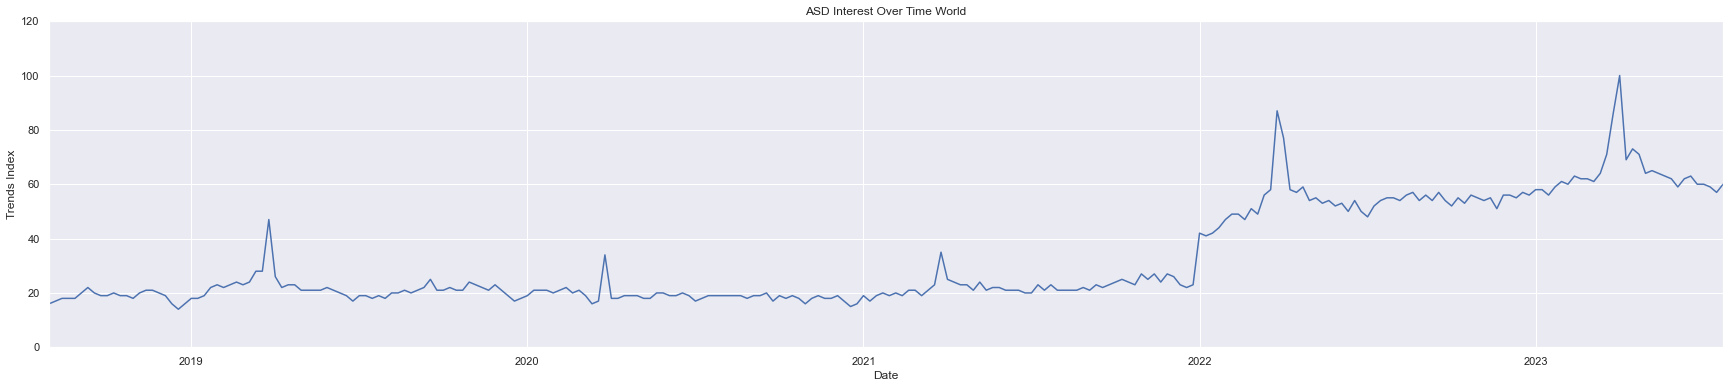

In [236]:
# visualize IOT
iot_asd_disorder_global_df = iot_asd_disorder_global_df.set_index(iot_asd_disorder_global_df['Week'])
dx = iot_asd_disorder_global_df['Autistic Spectrum Disorders: (Worldwide)'].plot.line(figsize=(30,6), title=("ASD Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

#### Interest by region (Country) worldwide (ASD disorder)

In [237]:
ibr_asd_disorder_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_global/q_asd_disorder_global_geoMap.csv')
# reindex
ibr_asd_disorder_global_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_asd_disorder_global_df.columns = ibr_asd_disorder_global_df.iloc[0]
# remove row containing lables
ibr_asd_disorder_global_df = ibr_asd_disorder_global_df.tail(-1)
ibr_asd_disorder_global_df.head(10)

,Country,Autistic Spectrum Disorders: (8/1/18 - 8/1/23)
1,Chile,100
2,Ireland,93
3,Puerto Rico,85
4,Nicaragua,80
5,United Kingdom,77
6,Peru,74
7,Costa Rica,73
8,Guernsey,NaN
9,Paraguay,70
10,Jersey,NaN


In [238]:
# check missing values 
ibr_asd_disorder_global_df.isna().sum()

0
Country                                             0
Autistic Spectrum Disorders: (8/1/18 - 8/1/23)    184
dtype: int64

In [239]:
# there are 184 entries with NaN values 
# there is not enough data to compute the interest
# the NaN will be replaced with 0 ( consider no interest )
ibr_asd_disorder_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Country                                         250 non-null    object
 1   Autistic Spectrum Disorders: (8/1/18 - 8/1/23)  66 non-null     object
dtypes: object(2)
memory usage: 4.0+ KB


In [240]:
ibr_asd_disorder_global_df['Autistic Spectrum Disorders: (8/1/18 - 8/1/23)'] = ibr_asd_disorder_global_df['Autistic Spectrum Disorders: (8/1/18 - 8/1/23)'].fillna(0)
ibr_asd_disorder_global_df.head(10)

,Country,Autistic Spectrum Disorders: (8/1/18 - 8/1/23)
1,Chile,100
2,Ireland,93
3,Puerto Rico,85
4,Nicaragua,80
5,United Kingdom,77
6,Peru,74
7,Costa Rica,73
8,Guernsey,0
9,Paraguay,70
10,Jersey,0


In [241]:
ibr_asd_disorder_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Country                                         250 non-null    object
 1   Autistic Spectrum Disorders: (8/1/18 - 8/1/23)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [242]:
# change type of Trends index for Autistic Spectrum Disorders from object to int
ibr_asd_disorder_global_df = ibr_asd_disorder_global_df.astype({'Autistic Spectrum Disorders: (8/1/18 - 8/1/23)':'int'})
ibr_asd_disorder_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Country                                         250 non-null    object
 1   Autistic Spectrum Disorders: (8/1/18 - 8/1/23)  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [243]:
# sort countries/regions by trending index
ibr_asd_disorder_global_df = ibr_asd_disorder_global_df.sort_values(by=['Autistic Spectrum Disorders: (8/1/18 - 8/1/23)'], ascending=False)
ibr_asd_disorder_global_df.head(10)

,Country,Autistic Spectrum Disorders: (8/1/18 - 8/1/23)
1,Chile,100
2,Ireland,93
3,Puerto Rico,85
4,Nicaragua,80
5,United Kingdom,77
6,Peru,74
7,Costa Rica,73
9,Paraguay,70
11,Bolivia,69
12,Australia,68


Globaly the most searches on ASD seem to be made in latin American countries, Ireland and UK.

#### Related topics ASD - disorder, Worldwide

In [244]:
# read data
rt_asd_disorder_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_global/q_asd_disorder_global_relatedEntities.csv', skiprows=2)
rt_asd_disorder_global_df

,TOP
Autism,100
Child,97
Spectrum,48
Symptom,36
Disease,34
Adult,34
Attention deficit hyperactivity disorder,32
Exam,31
Medical diagnosis,24
Therapy,23


There is no missing data. RISING appears as NaN , however this is the title of the second part of the dataset - the data set will be split in 2: TOP searches and Rising searches.

In [245]:
# select top 25 related topics (maximum Google Trends provided)
rt_asd_disorder_global_df_top = rt_asd_disorder_global_df.iloc[:25]
rt_asd_disorder_global_df_top = rt_asd_disorder_global_df_top.reset_index()
rt_asd_disorder_global_df_top = rt_asd_disorder_global_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_asd_disorder_global_df_top.head()

,Top related topic World,Trend index
0,Autism,100
1,Child,97
2,Spectrum,48
3,Symptom,36
4,Disease,34


In [246]:
# select rising related topics
rt_asd_disorder_global_df_rising = rt_asd_disorder_global_df.iloc[25:]
rt_asd_disorder_global_df_rising = rt_asd_disorder_global_df_rising.reset_index()
rt_asd_disorder_global_df_rising = rt_asd_disorder_global_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_asd_disorder_global_df_rising = rt_asd_disorder_global_df_rising.tail(-1)
rt_asd_disorder_global_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,childhood,Breakout
3,Signs and symptoms,Breakout
4,Autistic child,Breakout
5,People,Breakout


The data above shows that, globally, Autism spectrum disorder queries are related with topics like Autism, childhood, symptoms and disease. Peoples who search ASD seem to be looking more for descriptive information on the topic and no so much about therapies. 

We could conclude that people interested in ASD are not necesarly interesed in ABA, but people interested in ABA seem to also be interested in ASD.

#### Related queries - ASD disorder - worldwide



In [247]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_asd_disorder_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_global/q_asd_disorder_global_relatedQueries.csv', skiprows=2)
rq_asd_disorder_global_df

,TOP
autism,100
autismo,37
asd,25
autistic,19
autista,12
tea,11
autism spectrum,8
autism test,7
自 閉 症,7
adhd,5


In [248]:
# select the top related queries/words
rq_asd_disorder_global_df_top = rq_asd_disorder_global_df.iloc[:25]
rq_asd_disorder_global_df_top.reset_index(inplace=True)
rq_asd_disorder_global_df_top.head()

,index,TOP
0,autism,100
1,autismo,37
2,asd,25
3,autistic,19
4,autista,12


In [249]:
# rename the columns appropriately
rq_asd_disorder_global_df_top = rq_asd_disorder_global_df_top.rename(columns={"index": "World Top related query word", "TOP": "Trend index"})
rq_asd_disorder_global_df_top.head()

,World Top related query word,Trend index
0,autism,100
1,autismo,37
2,asd,25
3,autistic,19
4,autista,12


In [250]:
# select the rising related queries/words
rq_asd_disorder_global_df_rising = rq_asd_disorder_global_df.iloc[25:]
rq_asd_disorder_global_df_rising = rq_asd_disorder_global_df_rising.reset_index()
rq_asd_disorder_global_df_rising.head()

,index,TOP
0,RISING,NaN
1,greta thunberg,Breakout
2,اوتیسم,"+3,850%"
3,neurodivergent,"+3,600%"
4,idrlabs autism test,"+3,400%"


In [251]:
# rename the columns appropriately
rq_asd_disorder_global_df_rising = rq_asd_disorder_global_df_rising.rename(columns={"index": "World Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_asd_disorder_global_df_rising = rq_asd_disorder_global_df_rising.tail(-1)
rq_asd_disorder_global_df_rising.head()

,World Rising related query word,search increase
1,greta thunberg,Breakout
2,اوتیسم,"+3,850%"
3,neurodivergent,"+3,600%"
4,idrlabs autism test,"+3,400%"
5,raads-r test,"+3,200%"


The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Autistic spectrum disorders'.

The 2 data bases representig global data:
- rq_asd_disorder_global_df_rising
- rq_asd_disorder_global_df_top

#### IOT UK ASD-disorder

In [252]:
# read uk data
iot_asd_disorder_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_uk/q_asd_disorder_uk_multiTimeline.csv')
iot_asd_disorder_uk_df.head()

,Category: All categories
Week,Autistic Spectrum Disorders: (United Kingdom)
2018-08-05,17
2018-08-12,15
2018-08-19,16
2018-08-26,15


In [253]:
# reset index
iot_asd_disorder_uk_df = iot_asd_disorder_uk_df.reset_index()
# rename the columns with the correct lables
iot_asd_disorder_uk_df.columns = iot_asd_disorder_uk_df.iloc[0]
# remove row containing lables
iot_asd_disorder_uk_df = iot_asd_disorder_uk_df.tail(-1)
iot_asd_disorder_uk_df.head()

,Week,Autistic Spectrum Disorders: (United Kingdom)
1,2018-08-05,17
2,2018-08-12,15
3,2018-08-19,16
4,2018-08-26,15
5,2018-09-02,18


In [254]:
# no missing data / null values
iot_asd_disorder_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Week                                           260 non-null    object
 1   Autistic Spectrum Disorders: (United Kingdom)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [255]:
# change Autistic Spectrum Disorders: (United Kingdom) type from object to int
iot_asd_disorder_uk_df['Autistic Spectrum Disorders: (United Kingdom)'] = pd.to_numeric(iot_asd_disorder_uk_df['Autistic Spectrum Disorders: (United Kingdom)'])
# change week type to datetime
iot_asd_disorder_uk_df['Week'] = pd.to_datetime(iot_asd_disorder_uk_df['Week'])
iot_asd_disorder_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Week                                           260 non-null    datetime64[ns]
 1   Autistic Spectrum Disorders: (United Kingdom)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

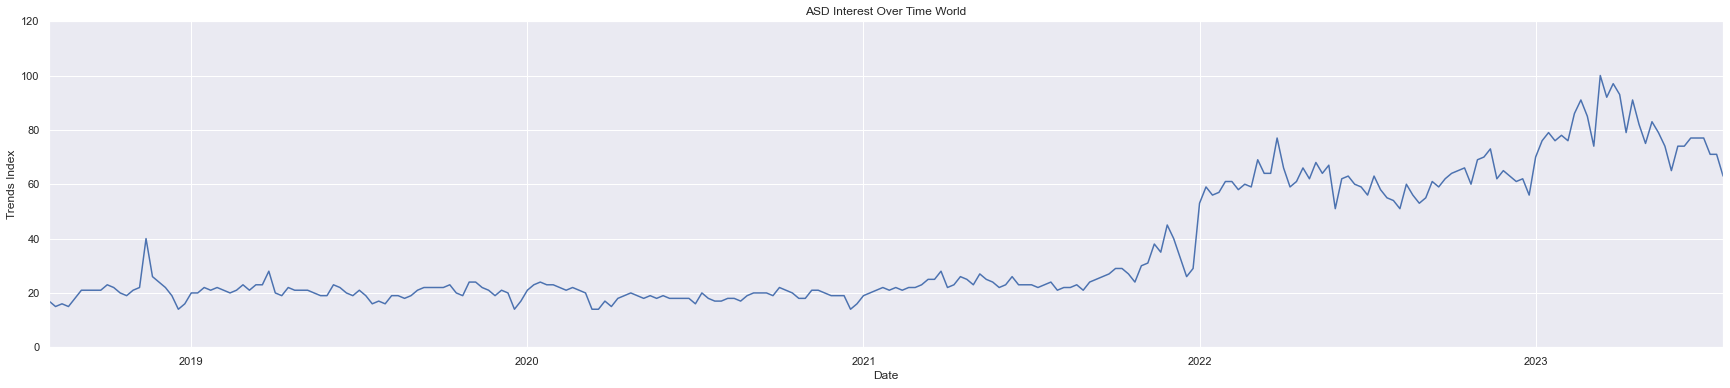

In [256]:
# visualize IOT
iot_asd_disorder_uk_df = iot_asd_disorder_uk_df.set_index(iot_asd_disorder_uk_df['Week'])
dx = iot_asd_disorder_uk_df['Autistic Spectrum Disorders: (United Kingdom)'].plot.line(figsize=(30,6), title=("ASD Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

##### Interest by region (Country) UK (ASD disorder)

In [257]:
ibr_asd_disorder_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_uk/q_asd_disorder_uk_geoMap.csv')
# reindex
ibr_asd_disorder_uk_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_asd_disorder_uk_df.columns = ibr_asd_disorder_uk_df.iloc[0]
# remove row containing lables
ibr_asd_disorder_uk_df = ibr_asd_disorder_uk_df.tail(-1)
ibr_asd_disorder_uk_df.head(10)

,Region,Autistic Spectrum Disorders: (8/1/18 - 8/1/23)
1,Northern Ireland,100
2,Wales,90
3,England,81
4,Scotland,80


Interest about ASD seems to be similar across the 4 countries in the UK, with N. Ireland and Wales having overall more searches than England and Scotland.

#### Related topics UK (ASD-disorder)

In [258]:
# read data
rt_asd_disorder_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_uk/q_asd_disorder_uk_relatedEntities.csv', skiprows=2)
rt_asd_disorder_uk_df

,TOP
Autism,100
Exam,87
Adult,65
Attention deficit hyperactivity disorder,59
Spectrum,40
Medical diagnosis,40
Disease,37
Symptom,30
Sign,25
Asperger syndrome,24


In [259]:

# no missing data - Risisng has a NaN values, but this is a title
# select top 25 related topics (maximum Google Trends provided)
rt_asd_disorder_uk_df_top = rt_asd_disorder_uk_df.iloc[:25]
rt_asd_disorder_uk_df_top = rt_asd_disorder_uk_df_top.reset_index()
rt_asd_disorder_uk_df_top = rt_asd_disorder_uk_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_asd_disorder_uk_df_top.head()

,Top related topic World,Trend index
0,Autism,100
1,Exam,87
2,Adult,65
3,Attention deficit hyperactivity disorder,59
4,Spectrum,40


In [260]:
# select rising related topics
rt_asd_disorder_uk_df_rising = rt_asd_disorder_uk_df.iloc[25:]
rt_asd_disorder_uk_df_rising = rt_asd_disorder_uk_df_rising.reset_index()
rt_asd_disorder_uk_df_rising = rt_asd_disorder_uk_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_asd_disorder_uk_df_rising = rt_asd_disorder_uk_df_rising.tail(-1)
rt_asd_disorder_uk_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,Signs and symptoms,Breakout
3,Autistic child,Breakout
4,Education,Breakout
5,Son,Breakout


The data above indicates that, in UK, similarly to the rest of the world, in peoples' online searches, ASD is related to symptoms and children/boys ( *autistic child*, *son* ). However, in UK, people seem to be also interesed in adult ASD, ADHD and education.

#### Related queries - ASD disorder - UK

In [261]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_asd_disorder_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_disorder/q_asd_disorder_uk/q_asd_disorder_uk_relatedQueries.csv', skiprows=2)
rq_asd_disorder_uk_df

,TOP
autism,100
autistic,24
asd,23
autism test,11
adhd,8
autism uk,7
what is autism,5
autism adults,5
autism spectrum,5
autism signs,5


In [262]:
# select the top related queries/words
rq_asd_disorder_uk_df_top = rq_asd_disorder_uk_df.iloc[:25]
rq_asd_disorder_uk_df_top.reset_index(inplace=True)
rq_asd_disorder_uk_df_top.head()

,index,TOP
0,autism,100
1,autistic,24
2,asd,23
3,autism test,11
4,adhd,8


In [263]:
# rename the columns appropriately
rq_asd_disorder_uk_df_top = rq_asd_disorder_uk_df_top.rename(columns={"index": "UK Top related query word", "TOP": "Trend index"})
rq_asd_disorder_uk_df_top.head()

,UK Top related query word,Trend index
0,autism,100
1,autistic,24
2,asd,23
3,autism test,11
4,adhd,8


In [264]:
# select the rising related queries/words
rq_asd_disorder_uk_df_rising = rq_asd_disorder_uk_df.iloc[25:]
rq_asd_disorder_uk_df_rising = rq_asd_disorder_uk_df_rising.reset_index()
rq_asd_disorder_uk_df_rising.head()

,index,TOP
0,RISING,NaN
1,christine mcguinness,Breakout
2,raads autism test,Breakout
3,is sheldon autistic,Breakout
4,right to choose autism,Breakout


In [265]:
# rename the columns appropriately
rq_asd_disorder_uk_df_rising = rq_asd_disorder_uk_df_rising.rename(columns={"index": "UK Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_asd_disorder_uk_df_rising = rq_asd_disorder_uk_df_rising.tail(-1)
rq_asd_disorder_uk_df_rising.head()

,UK Rising related query word,search increase
1,christine mcguinness,Breakout
2,raads autism test,Breakout
3,is sheldon autistic,Breakout
4,right to choose autism,Breakout
5,neurodivergent,Breakout


People in UK seems to be increasingly intereseted in ASD testing in adults (*raads* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3907126/) and ADHD. UK searches are also related to media portrails of ASD. 

The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Autistic spectrum disorders'.

The 2 data bases representig UK data:
- rq_asd_disorder_UK_df_rising
- rq_asd_disorder_UK_df_top

### Autistic speactrum disorder - search term - Google trends data

#### IOT Worldwide

In [266]:
# read uk data
iot_asd_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_global/q_asd_search_term_global_multiTimeline.csv')
iot_asd_search_term_global_df.head()

,Category: All categories
Week,Autistic Spectrum Disorder: (Worldwide)
2018-08-05,66
2018-08-12,60
2018-08-19,64
2018-08-26,36


In [267]:
# reset index
iot_asd_search_term_global_df = iot_asd_search_term_global_df.reset_index()
# rename the columns with the correct lables
iot_asd_search_term_global_df.columns = iot_asd_search_term_global_df.iloc[0]
# remove row containing lables
iot_asd_search_term_global_df = iot_asd_search_term_global_df.tail(-1)
iot_asd_search_term_global_df.head()

,Week,Autistic Spectrum Disorder: (Worldwide)
1,2018-08-05,66
2,2018-08-12,60
3,2018-08-19,64
4,2018-08-26,36
5,2018-09-02,57


In [268]:
# no missing data / null values
iot_asd_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Week                                     260 non-null    object
 1   Autistic Spectrum Disorder: (Worldwide)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [269]:
# change Autistic Spectrum Disorders: (Worldwide) type from object to int
iot_asd_search_term_global_df['Autistic Spectrum Disorder: (Worldwide)'] = pd.to_numeric(iot_asd_search_term_global_df['Autistic Spectrum Disorder: (Worldwide)'])
# change week type to datetime
iot_asd_search_term_global_df['Week'] = pd.to_datetime(iot_asd_search_term_global_df['Week'])
iot_asd_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Week                                     260 non-null    datetime64[ns]
 1   Autistic Spectrum Disorder: (Worldwide)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

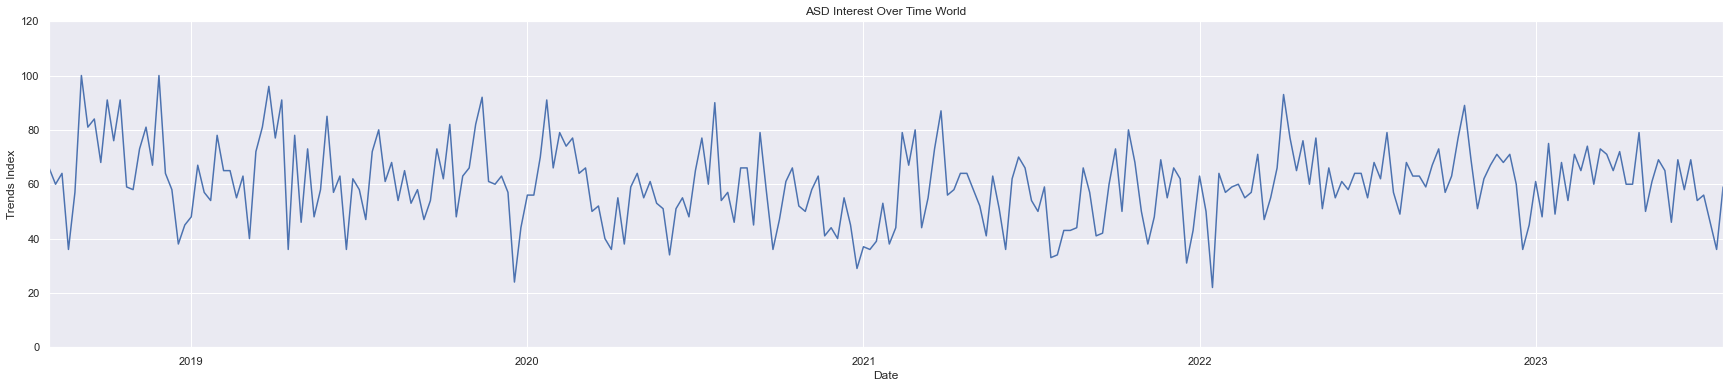

In [270]:
# visualize IOT
iot_asd_search_term_global_df = iot_asd_search_term_global_df.set_index(iot_asd_search_term_global_df['Week'])
dx = iot_asd_search_term_global_df['Autistic Spectrum Disorder: (Worldwide)'].plot.line(figsize=(30,6), title=("ASD Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

#### Interest by region (Country) worldwide (ASD search term)

In [271]:
ibr_asd_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_global/q_asd_search_term_global_geoMap.csv')
# reindex
ibr_asd_search_term_global_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_asd_search_term_global_df.columns = ibr_asd_search_term_global_df.iloc[0]
# remove row containing lables
ibr_asd_search_term_global_df = ibr_asd_search_term_global_df.tail(-1)
ibr_asd_search_term_global_df.head(20)

,Country,Autistic Spectrum Disorder: (8/1/18 - 8/1/23)
1,Ireland,100
2,New Zealand,73
3,United Kingdom,68
4,Hong Kong,62
5,Australia,55
6,Philippines,44
7,South Africa,38
8,Canada,38
9,Malaysia,36
10,Nigeria,23


In [272]:
# check missing values 
ibr_asd_search_term_global_df.isna().sum()

0
Country                                            0
Autistic Spectrum Disorder: (8/1/18 - 8/1/23)    237
dtype: int64

In [273]:
# 237  missing data
# there is not enough data to compute the interest
# the NaN will be replaced with 0 ( consider no interest )
ibr_asd_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Country                                        250 non-null    object
 1   Autistic Spectrum Disorder: (8/1/18 - 8/1/23)  13 non-null     object
dtypes: object(2)
memory usage: 4.0+ KB


In [274]:
ibr_asd_search_term_global_df['Autistic Spectrum Disorder: (8/1/18 - 8/1/23)'] = ibr_asd_search_term_global_df['Autistic Spectrum Disorder: (8/1/18 - 8/1/23)'].fillna(0)
ibr_asd_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Country                                        250 non-null    object
 1   Autistic Spectrum Disorder: (8/1/18 - 8/1/23)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [275]:
# change type of Trends index for Autistic Spectrum Disorders from object to int
ibr_asd_search_term_global_df = ibr_asd_search_term_global_df.astype({'Autistic Spectrum Disorder: (8/1/18 - 8/1/23)':'int'})
ibr_asd_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Country                                        250 non-null    object
 1   Autistic Spectrum Disorder: (8/1/18 - 8/1/23)  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [276]:
# sort countries/regions by trending index
ibr_asd_search_term_global_df = ibr_asd_search_term_global_df.sort_values(by=['Autistic Spectrum Disorder: (8/1/18 - 8/1/23)'], ascending=False)
ibr_asd_search_term_global_df.head(20)

,Country,Autistic Spectrum Disorder: (8/1/18 - 8/1/23)
1,Ireland,100
2,New Zealand,73
3,United Kingdom,68
4,Hong Kong,62
5,Australia,55
6,Philippines,44
7,South Africa,38
8,Canada,38
9,Malaysia,36
10,Nigeria,23


#### Related topics ASD - search term, Worldwide

In [277]:
# read data
rt_asd_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_global/q_asd_search_term_global_relatedEntities.csv', skiprows=2)
rt_asd_search_term_global_df

,TOP
Autistic Spectrum Disorders,100
Spectrum,94
Disease,75
Child,16
Autism,7
Asperger syndrome,6
Adult,6
Symptom,6
Attention deficit hyperactivity disorder,5
Syndrome,5


There is no missing data. RISING appears as NaN , however this is the title of the second part of the dataset - the data set will be split in 2: TOP searches and Rising searches.

In [278]:
# select top 25 related topics (maximum Google Trends provided)
rt_asd_search_term_global_df_top = rt_asd_search_term_global_df.iloc[:25]
rt_asd_search_term_global_df_top = rt_asd_search_term_global_df_top.reset_index()
rt_asd_search_term_global_df_top = rt_asd_search_term_global_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_asd_search_term_global_df_top.head()

,Top related topic World,Trend index
0,Autistic Spectrum Disorders,100
1,Spectrum,94
2,Disease,75
3,Child,16
4,Autism,7


In [279]:
# select rising related topics
rt_asd_search_term_global_df_rising = rt_asd_search_term_global_df.iloc[25:]
rt_asd_search_term_global_df_rising = rt_asd_search_term_global_df_rising.reset_index()
rt_asd_search_term_global_df_rising = rt_asd_search_term_global_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_asd_search_term_global_df_rising = rt_asd_search_term_global_df_rising.tail(-1)
rt_asd_search_term_global_df_rising.head()

,Rising related topic World,Trend index
1,Autistic child,Breakout
2,Signs and symptoms,Breakout
3,People,Breakout
4,succeeding,Breakout
5,Neurodiversity,Breakout


The data above shows that, globally, Autism spectrum disorder queries are related with topics like Autistic, child, symptoms and disease. Peoples who search using the keyword *ASD* seem to be looking more for descriptive information on the topic and no so much about therapies. 
There seem to be increase interest worldwide regarding ASD and neurodiversity and succeeding (whatever that means).

We could conclude that people interested in ASD are not necesarly interesed in ABA, but people interested in ABA seem to also be interested in ASD.

#### Related queries - ASD search term - worldwide


In [280]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_asd_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_global/q_asd_search_term_global_relatedQueries.csv', skiprows=2)
rq_asd_search_term_global_df

,TOP
autism,100
autism spectrum,99
autism disorder,98
autism spectrum disorder,98
what is autistic disorder,24
what is autistic spectrum disorder,24
what is spectrum disorder,23
autistic child,21
autistic children,21
autistic spectrum disorder symptoms,19


In [281]:
# select the top related queries/words
rq_asd_search_term_global_df_top = rq_asd_search_term_global_df.iloc[:25]
rq_asd_search_term_global_df_top.reset_index(inplace=True)
rq_asd_search_term_global_df_top.head()

,index,TOP
0,autism,100
1,autism spectrum,99
2,autism disorder,98
3,autism spectrum disorder,98
4,what is autistic disorder,24


In [282]:
# rename the columns appropriately
rq_asd_search_term_global_df_top = rq_asd_search_term_global_df_top.rename(columns={"index": "World Top related query word", "TOP": "Trend index"})
rq_asd_search_term_global_df_top.head()

,World Top related query word,Trend index
0,autism,100
1,autism spectrum,99
2,autism disorder,98
3,autism spectrum disorder,98
4,what is autistic disorder,24


In [283]:
# select the rising related queries/words
rq_asd_search_term_global_df_rising = rq_asd_search_term_global_df.iloc[25:]
rq_asd_search_term_global_df_rising = rq_asd_search_term_global_df_rising.reset_index()
rq_asd_search_term_global_df_rising.head()

,index,TOP
0,RISING,NaN
1,adhd meaning,Breakout
2,tourette syndrome,Breakout
3,tea,Breakout
4,dyslexia meaning,Breakout


In [284]:
# rename the columns appropriately
rq_asd_search_term_global_df_rising = rq_asd_search_term_global_df_rising.rename(columns={"index": "World Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_asd_search_term_global_df_rising = rq_asd_search_term_global_df_rising.tail(-1)
rq_asd_search_term_global_df_rising.head()

,World Rising related query word,search increase
1,adhd meaning,Breakout
2,tourette syndrome,Breakout
3,tea,Breakout
4,dyslexia meaning,Breakout
5,dysgraphia,Breakout


The 2 data frames created above will be used as a word bank for related query words related to the search term of 'Autistic spectrum disorders'.

The 2 data bases representig global data:
- rq_asd_search_term_global_df_rising
- rq_asd_search_term_global_df_top

#### IOT UK ASD-search term

In [285]:
# read uk data
iot_asd_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_uk/q_asd_search_term_uk_multiTimeline.csv')
iot_asd_search_term_uk_df.head()

,Category: All categories
Week,Autistic Spectrum Disorder: (United Kingdom)
2018-08-05,38
2018-08-12,40
2018-08-19,0
2018-08-26,0


In [286]:
# reset index
iot_asd_search_term_uk_df = iot_asd_search_term_uk_df.reset_index()
# rename the columns with the correct lables
iot_asd_search_term_uk_df.columns = iot_asd_search_term_uk_df.iloc[0]
# remove row containing lables
iot_asd_search_term_uk_df = iot_asd_search_term_uk_df.tail(-1)
iot_asd_search_term_uk_df.head()

,Week,Autistic Spectrum Disorder: (United Kingdom)
1,2018-08-05,38
2,2018-08-12,40
3,2018-08-19,0
4,2018-08-26,0
5,2018-09-02,0


In [287]:
# no missing data / null values
iot_asd_search_term_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Week                                          260 non-null    object
 1   Autistic Spectrum Disorder: (United Kingdom)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [288]:
# change Autistic Spectrum Disorders: (United Kingdom) type from object to int
iot_asd_search_term_uk_df['Autistic Spectrum Disorder: (United Kingdom)'] = pd.to_numeric(iot_asd_search_term_uk_df['Autistic Spectrum Disorder: (United Kingdom)'])
# change week type to datetime
iot_asd_search_term_uk_df['Week'] = pd.to_datetime(iot_asd_search_term_uk_df['Week'])
iot_asd_search_term_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Week                                          260 non-null    datetime64[ns]
 1   Autistic Spectrum Disorder: (United Kingdom)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

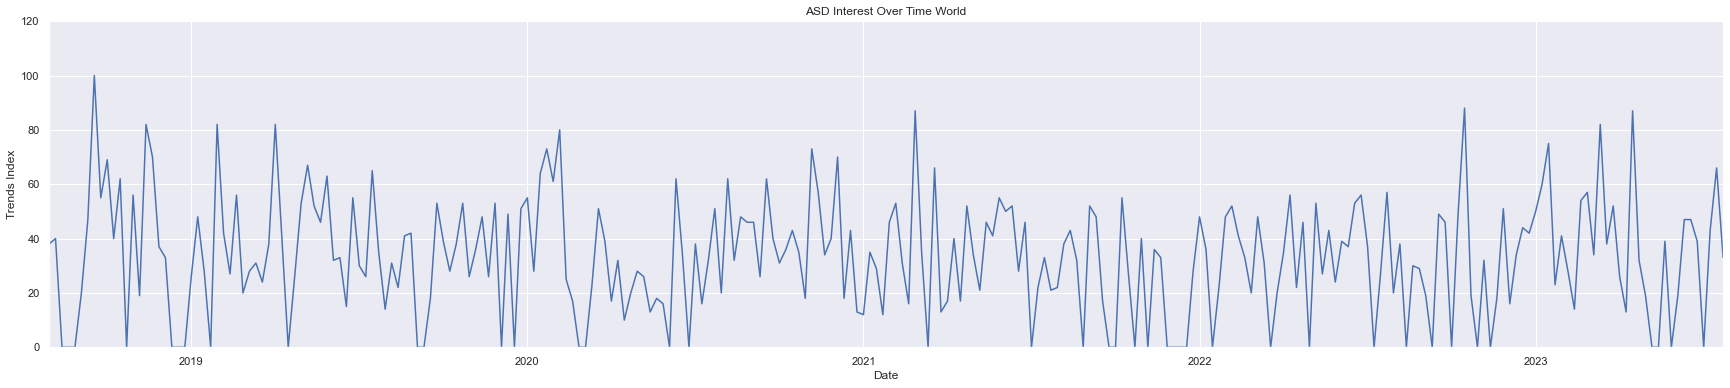

In [289]:
# visualize IOT
iot_asd_search_term_uk_df = iot_asd_search_term_uk_df.set_index(iot_asd_search_term_uk_df['Week'])
dx = iot_asd_search_term_uk_df['Autistic Spectrum Disorder: (United Kingdom)'].plot.line(figsize=(30,6), title=("ASD Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

There are some 0 values -> this is because when quering for a seach term (here *Autistic Spectrum Disorder*), Google ternds only shows data for exact matches - this doesn't include misspellings for example.

##### Interest by region (Country) UK (ASD search term)

In [290]:
ibr_asd_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_uk/q_asd_search_term_uk_geoMap.csv')
# reindex
ibr_asd_search_term_uk_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_asd_search_term_uk_df.columns = ibr_asd_search_term_uk_df.iloc[0]
# remove row containing lables
ibr_asd_search_term_uk_df = ibr_asd_search_term_uk_df.tail(-1)
ibr_asd_search_term_uk_df.head(10)

,Region,Autistic Spectrum Disorder: (8/1/18 - 8/1/23)
1,Wales,100
2,Scotland,89
3,England,82
4,Northern Ireland,NaN


People in NI do not use the exact keyword *Autistic Spectrum Disorder* when they look for ASD online - the NaN value is because when quering for a seach term (here *Autistic Spectrum Disorder*), Google ternds only shows data for exact matches. As previous data shows, there is high interest in ASD in  NI, but people are using different spellings or acronyms ( see analysis above - *Autistic Spectrum Disorder* as disorder/topic)

#### Related topics UK (ASD-search term)

In [291]:
# read data
rt_asd_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_uk/q_asd_search_term_uk_relatedEntities.csv', skiprows=2)
rt_asd_search_term_uk_df

,TOP
Autistic Spectrum Disorders,100
Spectrum,95
Disease,78
Child,13
Asperger syndrome,8
Adult,7
Attention deficit hyperactivity disorder,6
Syndrome,5
Medical diagnosis,5
Symptom,5


In [292]:

# no missing data - Risisng has a NaN values, but this is a title
# select top 25 related topics (maximum Google Trends provided)
rt_asd_search_term_uk_df_top = rt_asd_search_term_uk_df.iloc[:25]
rt_asd_search_term_uk_df_top = rt_asd_search_term_uk_df_top.reset_index()
rt_asd_search_term_uk_df_top = rt_asd_search_term_uk_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_asd_search_term_uk_df_top.head()

,Top related topic World,Trend index
0,Autistic Spectrum Disorders,100
1,Spectrum,95
2,Disease,78
3,Child,13
4,Asperger syndrome,8


In [293]:
# select rising related topics
rt_asd_search_term_uk_df_rising = rt_asd_search_term_uk_df.iloc[25:]
rt_asd_search_term_uk_df_rising = rt_asd_search_term_uk_df_rising.reset_index()
rt_asd_search_term_uk_df_rising = rt_asd_search_term_uk_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_asd_search_term_uk_df_rising = rt_asd_search_term_uk_df_rising.tail(-1)
rt_asd_search_term_uk_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,People,Breakout
3,Autistic child,Breakout
4,Learning,Breakout
5,Signs and symptoms,Breakout


The data above indicates that, in UK, similarly to the rest of the world, in peoples' online searches, the ASD term is related to symptoms and child ( *autistic child*, *son* ). However, in UK, people seem to be also interesed in Asperger syndrome and learning.

#### Related queries - ASD search term - UK

In [294]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_asd_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_asd_search_term/q_asd_search_term_uk/q_asd_search_term_uk_relatedQueries.csv', skiprows=2)
rq_asd_search_term_uk_df

,TOP
autism spectrum disorder,100
autism,100
autism spectrum,99
what is autistic spectrum disorder,39
what is autism spectrum disorder,23
what is autism,23
autistic spectrum disorder symptoms,20
asd,19
adhd,15
autistic spectrum disorder test,13


In [295]:
# select the top related queries/words
rq_asd_search_term_uk_df_top = rq_asd_search_term_uk_df.iloc[:25]
rq_asd_search_term_uk_df_top.reset_index(inplace=True)
rq_asd_search_term_uk_df_top.head()

,index,TOP
0,autism spectrum disorder,100
1,autism,100
2,autism spectrum,99
3,what is autistic spectrum disorder,39
4,what is autism spectrum disorder,23


In [296]:
# rename the columns appropriately
rq_asd_search_term_uk_df_top = rq_asd_search_term_uk_df_top.rename(columns={"index": "UK Top related query word", "TOP": "Trend index"})
rq_asd_search_term_uk_df_top.head()

,UK Top related query word,Trend index
0,autism spectrum disorder,100
1,autism,100
2,autism spectrum,99
3,what is autistic spectrum disorder,39
4,what is autism spectrum disorder,23


In [297]:
# select the rising related queries/words
rq_asd_search_term_uk_df_rising = rq_asd_search_term_uk_df.iloc[25:]
rq_asd_search_term_uk_df_rising = rq_asd_search_term_uk_df_rising.reset_index()
rq_asd_search_term_uk_df_rising.head()

,index,TOP
0,RISING,NaN
1,autistic spectrum disorder can be contributed ...,Breakout
2,autism meaning,+250%
3,dyspraxia,+170%
4,borderline personality disorder,+110%


In [298]:
# rename the columns appropriately
rq_asd_search_term_uk_df_rising = rq_asd_search_term_uk_df_rising.rename(columns={"index": "UK Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_asd_search_term_uk_df_rising = rq_asd_search_term_uk_df_rising.tail(-1)
rq_asd_search_term_uk_df_rising.head()

,UK Rising related query word,search increase
1,autistic spectrum disorder can be contributed ...,Breakout
2,autism meaning,+250%
3,dyspraxia,+170%
4,borderline personality disorder,+110%
5,what is autism,+100%


In UK people are increasingly interested in ASD and associated conditions - dyspraxia, borderline personality disorder.

The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Autistic spectrum disorders'.

The 2 data bases representig UK data:
- rq_asd_search_term_uk_df_rising
- rq_asd_search_term_uk_df_top

### Autism - search term - Google trends data

#### IOT Worldwide Autism search term

In [299]:
# read uk data
iot_autism_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_global/q_autism_search_term_global_multiTimeline.csv')
iot_autism_search_term_global_df.head()

,Category: All categories
Week,Autism: (Worldwide)
2018-08-05,38
2018-08-12,39
2018-08-19,39
2018-08-26,40


In [300]:
# reset index
iot_autism_search_term_global_df = iot_autism_search_term_global_df.reset_index()
# rename the columns with the correct lables
iot_autism_search_term_global_df.columns = iot_autism_search_term_global_df.iloc[0]
# remove row containing lables
iot_autism_search_term_global_df = iot_autism_search_term_global_df.tail(-1)
iot_autism_search_term_global_df.head()

,Week,Autism: (Worldwide)
1,2018-08-05,38
2,2018-08-12,39
3,2018-08-19,39
4,2018-08-26,40
5,2018-09-02,41


In [301]:
# no missing data / null values
iot_autism_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Week                 260 non-null    object
 1   Autism: (Worldwide)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [302]:
# change Autistic Spectrum Disorders: (Worldwide) type from object to int
iot_autism_search_term_global_df['Autism: (Worldwide)'] = pd.to_numeric(iot_autism_search_term_global_df['Autism: (Worldwide)'])
# change week type to datetime
iot_autism_search_term_global_df['Week'] = pd.to_datetime(iot_autism_search_term_global_df['Week'])
iot_autism_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Week                 260 non-null    datetime64[ns]
 1   Autism: (Worldwide)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

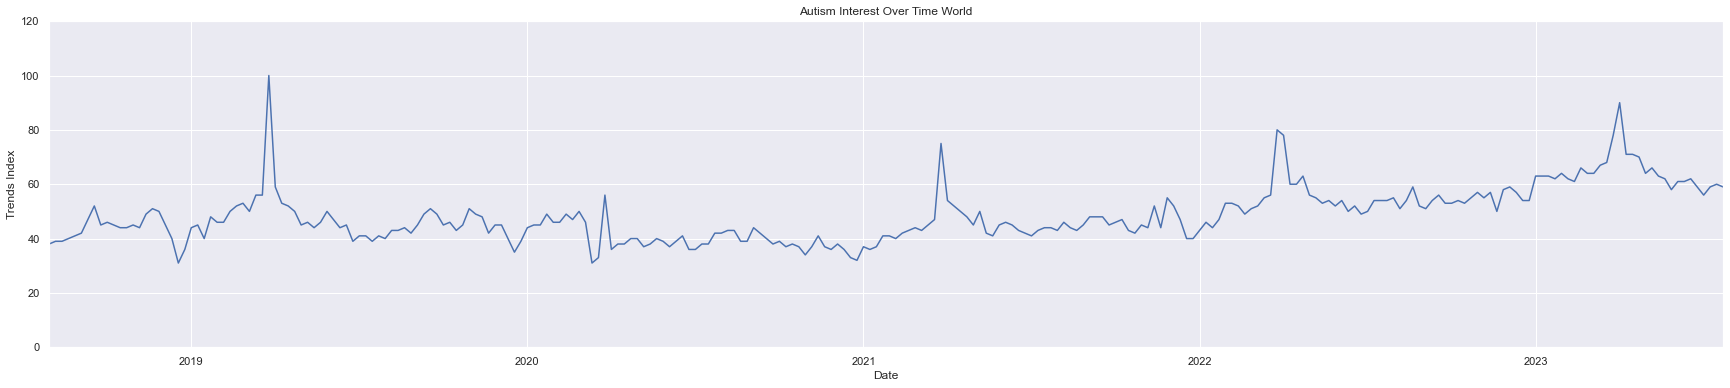

In [303]:
# visualize IOT
iot_autism_search_term_global_df = iot_autism_search_term_global_df.set_index(iot_autism_search_term_global_df['Week'])
dx = iot_autism_search_term_global_df['Autism: (Worldwide)'].plot.line(figsize=(30,6), title=("Autism Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

#### Interest by region (Country) worldwide (Autism search term)

In [304]:
ibr_autism_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_global/q_autism_search_term_global_geoMap.csv')
# reindex
ibr_autism_search_term_global_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_autism_search_term_global_df.columns = ibr_autism_search_term_global_df.iloc[0]
# remove row containing lables
ibr_autism_search_term_global_df = ibr_autism_search_term_global_df.tail(-1)
ibr_autism_search_term_global_df.head(20)

,Country,Autism: (8/1/18 - 8/1/23)
1,Palau,NaN
2,Ireland,100
3,Jersey,NaN
4,United Kingdom,89
5,Guernsey,NaN
6,Cook Islands,NaN
7,Isle of Man,NaN
8,Australia,73
9,Gibraltar,NaN
10,Malta,NaN


In [305]:
# check missing values 
ibr_autism_search_term_global_df.isna().sum()

0
Country                        0
Autism: (8/1/18 - 8/1/23)    204
dtype: int64

In [306]:
# 204  missing data
# there is not enough data to compute the interest
# the NaN will be replaced with 0 ( consider no interest )
ibr_autism_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    250 non-null    object
 1   Autism: (8/1/18 - 8/1/23)  46 non-null     object
dtypes: object(2)
memory usage: 4.0+ KB


In [307]:
ibr_autism_search_term_global_df['Autism: (8/1/18 - 8/1/23)'] = ibr_autism_search_term_global_df['Autism: (8/1/18 - 8/1/23)'].fillna(0)
ibr_autism_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    250 non-null    object
 1   Autism: (8/1/18 - 8/1/23)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [308]:
# change type of Trends index for Autistic Spectrum Disorders from object to int
ibr_autism_search_term_global_df = ibr_autism_search_term_global_df.astype({'Autism: (8/1/18 - 8/1/23)':'int'})
ibr_autism_search_term_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    250 non-null    object
 1   Autism: (8/1/18 - 8/1/23)  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [309]:
# sort countries/regions by trending index
ibr_autism_search_term_global_df = ibr_autism_search_term_global_df.sort_values(by=['Autism: (8/1/18 - 8/1/23)'], ascending=False)
ibr_autism_search_term_global_df.head(20)

,Country,Autism: (8/1/18 - 8/1/23)
2,Ireland,100
4,United Kingdom,89
8,Australia,73
12,Sweden,65
13,United States,63
15,Canada,57
20,New Zealand,51
33,Singapore,40
34,Kenya,39
47,Philippines,36


#### Related topics Autism - search term, Worldwide

In [310]:
# read data
rt_autism_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_global/q_autism_search_term_global_relatedEntities.csv', skiprows=2)
rt_autism_search_term_global_df

,TOP
Autistic Spectrum Disorders,100
Autism,15
Exam,7
Adult,6
Spectrum,6
Disease,6
Medical sign,6
Symptom,5
Therapy,5
Attention deficit hyperactivity disorder,4


There is no missing data. RISING appears as NaN , however this is the title of the second part of the dataset - the data set will be split in 2: TOP searches and Rising searches.

In [311]:
# select top 25 related topics (maximum Google Trends provided)
rt_autism_search_term_global_df_top = rt_autism_search_term_global_df.iloc[:25]
rt_autism_search_term_global_df_top = rt_autism_search_term_global_df_top.reset_index()
rt_autism_search_term_global_df_top = rt_autism_search_term_global_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_autism_search_term_global_df_top.head()

,Top related topic World,Trend index
0,Autistic Spectrum Disorders,100
1,Autism,15
2,Exam,7
3,Adult,6
4,Spectrum,6


In [312]:
# select rising related topics
rt_autism_search_term_global_df_rising = rt_autism_search_term_global_df.iloc[25:]
rt_autism_search_term_global_df_rising = rt_autism_search_term_global_df_rising.reset_index()
rt_autism_search_term_global_df_rising = rt_autism_search_term_global_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_autism_search_term_global_df_rising = rt_autism_search_term_global_df_rising.tail(-1)
rt_autism_search_term_global_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,Signs and symptoms,Breakout
3,Autistic child,Breakout
4,Autism Speaks,Breakout
5,People,Breakout


The data above shows that, globally, Autism queries are related with topics like ASD, Autistic, child and adult, symptoms and disease. Peoples who search using the keyword *autism* seem to be looking more for descriptive information on the topic and no so much about therapies. 
There seem to be increase interest worldwide in Autism Speaks - company/charity which advocates for ASD and provides services and resources to individuals with ASD.

#### Related queries - Autism search term - worldwide


In [313]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_autism_search_term_global_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_global/q_autism_search_term_global_relatedQueries.csv', skiprows=2)
rq_autism_search_term_global_df

,TOP
autism spectrum,100
autism test,92
what is autism,82
autism symptoms,74
autism signs,73
signs of autism,59
autistic,58
adhd,53
autism meaning,49
autism spectrum disorder,45


In [314]:
# select the top related queries/words
rq_autism_search_term_global_df_top = rq_autism_search_term_global_df.iloc[:25]
rq_autism_search_term_global_df_top.reset_index(inplace=True)
rq_autism_search_term_global_df_top.head()

,index,TOP
0,autism spectrum,100
1,autism test,92
2,what is autism,82
3,autism symptoms,74
4,autism signs,73


In [315]:
# rename the columns appropriately
rq_autism_search_term_global_df_top = rq_autism_search_term_global_df_top.rename(columns={"index": "World Top related query word", "TOP": "Trend index"})
rq_autism_search_term_global_df_top.head()

,World Top related query word,Trend index
0,autism spectrum,100
1,autism test,92
2,what is autism,82
3,autism symptoms,74
4,autism signs,73


In [316]:
# select the rising related queries/words
rq_autism_search_term_global_df_rising = rq_autism_search_term_global_df.iloc[25:]
rq_autism_search_term_global_df_rising = rq_autism_search_term_global_df_rising.reset_index()
rq_autism_search_term_global_df_rising.head()

,index,TOP
0,RISING,NaN
1,greta thunberg,Breakout
2,greta thunberg autism,Breakout
3,idrlabs autism test,Breakout
4,autism creature,"+4,150%"


In [317]:
# rename the columns appropriately
rq_autism_search_term_global_df_rising = rq_autism_search_term_global_df_rising.rename(columns={"index": "World Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_autism_search_term_global_df_rising = rq_autism_search_term_global_df_rising.tail(-1)
rq_autism_search_term_global_df_rising.head()

,World Rising related query word,search increase
1,greta thunberg,Breakout
2,greta thunberg autism,Breakout
3,idrlabs autism test,Breakout
4,autism creature,"+4,150%"
5,raads-r autism test,"+4,100%"


The 2 data frames created above will be used as a word bank for related query words related to the search term of 'Autistic spectrum disorders'.

The 2 data bases representig global data:
- rq_autism_search_term_global_df_rising
- rq_autism_search_term_global_df_top

#### IOT UK Autism-search term

In [318]:
# read uk data
iot_autism_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_uk/q_autism_search_term_uk_multiTimeline.csv')
iot_autism_search_term_uk_df.head()

,Category: All categories
Week,Autism: (United Kingdom)
2018-08-05,35
2018-08-12,33
2018-08-19,36
2018-08-26,32


In [319]:
# reset index
iot_autism_search_term_uk_df = iot_autism_search_term_uk_df.reset_index()
# rename the columns with the correct lables
iot_autism_search_term_uk_df.columns = iot_autism_search_term_uk_df.iloc[0]
# remove row containing lables
iot_autism_search_term_uk_df = iot_autism_search_term_uk_df.tail(-1)
iot_autism_search_term_uk_df.head()

,Week,Autism: (United Kingdom)
1,2018-08-05,35
2,2018-08-12,33
3,2018-08-19,36
4,2018-08-26,32
5,2018-09-02,36


In [320]:
# no missing data / null values
iot_autism_search_term_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Week                      260 non-null    object
 1   Autism: (United Kingdom)  260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [321]:
# change Autism: (United Kingdom) type from object to int
iot_autism_search_term_uk_df['Autism: (United Kingdom)'] = pd.to_numeric(iot_autism_search_term_uk_df['Autism: (United Kingdom)'])
# change week type to datetime
iot_autism_search_term_uk_df['Week'] = pd.to_datetime(iot_autism_search_term_uk_df['Week'])
iot_autism_search_term_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Week                      260 non-null    datetime64[ns]
 1   Autism: (United Kingdom)  260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

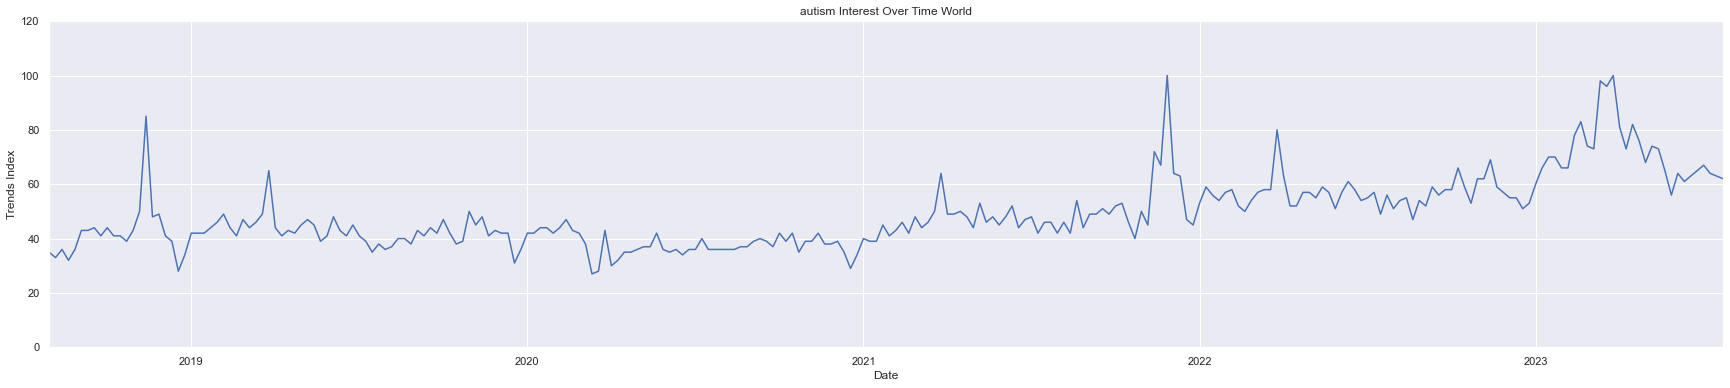

In [322]:
# visualize IOT
iot_autism_search_term_uk_df = iot_autism_search_term_uk_df.set_index(iot_autism_search_term_uk_df['Week'])
dx = iot_autism_search_term_uk_df['Autism: (United Kingdom)'].plot.line(figsize=(30,6), title=("autism Interest Over Time World"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

##### Interest by region (Country) UK (autism search term)

In [323]:
ibr_autism_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_uk/q_autism_search_term_uk_geoMap.csv')
# reindex
ibr_autism_search_term_uk_df.reset_index(inplace=True)
# rename the columns with the correct lables
ibr_autism_search_term_uk_df.columns = ibr_autism_search_term_uk_df.iloc[0]
# remove row containing lables
ibr_autism_search_term_uk_df = ibr_autism_search_term_uk_df.tail(-1)
ibr_autism_search_term_uk_df.head(10)

,Region,Autism: (8/1/18 - 8/1/23)
1,Northern Ireland,100
2,Wales,87
3,Scotland,83
4,England,79


Autism - term queries : people in NI make the most searches. 

#### Related topics UK (autism-search term)

In [324]:
# read data
rt_autism_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_uk/q_autism_search_term_uk_relatedEntities.csv', skiprows=2)
rt_autism_search_term_uk_df

,TOP
Autistic Spectrum Disorders,100
Autism,12
Exam,10
Adult,9
Attention deficit hyperactivity disorder,8
Medical sign,7
Symptom,6
Medical diagnosis,5
Disease,5
Spectrum,4


In [325]:

# no missing data - Risisng has a NaN values, but this is a title
# select top 25 related topics (maximum Google Trends provided)
rt_autism_search_term_uk_df_top = rt_autism_search_term_uk_df.iloc[:25]
rt_autism_search_term_uk_df_top = rt_autism_search_term_uk_df_top.reset_index()
rt_autism_search_term_uk_df_top = rt_autism_search_term_uk_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_autism_search_term_uk_df_top.head()

,Top related topic World,Trend index
0,Autistic Spectrum Disorders,100
1,Autism,12
2,Exam,10
3,Adult,9
4,Attention deficit hyperactivity disorder,8


In [326]:
# select rising related topics
rt_autism_search_term_uk_df_rising = rt_autism_search_term_uk_df.iloc[25:]
rt_autism_search_term_uk_df_rising = rt_autism_search_term_uk_df_rising.reset_index()
rt_autism_search_term_uk_df_rising = rt_autism_search_term_uk_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_autism_search_term_uk_df_rising = rt_autism_search_term_uk_df_rising.tail(-1)
rt_autism_search_term_uk_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,Signs and symptoms,Breakout
3,Autistic child,Breakout
4,National Autistic Society,Breakout
5,People,Breakout


People in UK search for *autism* and *symptoms*, *child*, *adult*, and related conditions - ADHD. 
In UK the charity/company people look for the most online in relation to *autism*, is the *National Autistic Society*.

#### Related queries - autism search term - UK

In [327]:
# read data
# same as above there is no missing data
# Rising appears as NaN, but this is in fact a title
rq_autism_search_term_uk_df = pd.read_csv('google trends wordbank/asd_wordbank/q_autism_search_term/q_autism_search_term_uk/q_autism_search_term_uk_relatedQueries.csv', skiprows=2)
rq_autism_search_term_uk_df

,TOP
autism test,100
autism uk,88
autism signs,73
autism symptoms,73
what is autism,70
autistic,69
adhd,66
signs of autism,60
autism spectrum,48
autism in adults,36


In [328]:
# select the top related queries/words
rq_autism_search_term_uk_df_top = rq_autism_search_term_uk_df.iloc[:25]
rq_autism_search_term_uk_df_top.reset_index(inplace=True)
rq_autism_search_term_uk_df_top.head()

,index,TOP
0,autism test,100
1,autism uk,88
2,autism signs,73
3,autism symptoms,73
4,what is autism,70


In [329]:
# rename the columns appropriately
rq_autism_search_term_uk_df_top = rq_autism_search_term_uk_df_top.rename(columns={"index": "UK Top related query word", "TOP": "Trend index"})
rq_autism_search_term_uk_df_top.head()

,UK Top related query word,Trend index
0,autism test,100
1,autism uk,88
2,autism signs,73
3,autism symptoms,73
4,what is autism,70


In [330]:
# select the rising related queries/words
rq_autism_search_term_uk_df_rising = rq_autism_search_term_uk_df.iloc[25:]
rq_autism_search_term_uk_df_rising = rq_autism_search_term_uk_df_rising.reset_index()
rq_autism_search_term_uk_df_rising.head()

,index,TOP
0,RISING,NaN
1,clinical partners autism test,Breakout
2,raads autism test,"+3,750%"
3,embrace autism test,"+3,250%"
4,christine mcguinness,"+2,900%"


In [331]:
# rename the columns appropriately
rq_autism_search_term_uk_df_rising = rq_autism_search_term_uk_df_rising.rename(columns={"index": "UK Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_autism_search_term_uk_df_rising = rq_autism_search_term_uk_df_rising.tail(-1)
rq_autism_search_term_uk_df_rising.head()

,UK Rising related query word,search increase
1,clinical partners autism test,Breakout
2,raads autism test,"+3,750%"
3,embrace autism test,"+3,250%"
4,christine mcguinness,"+2,900%"
5,neurodivergent,"+2,900%"


In UK people are mostly interested in symptoms and definitions autism. There is also an increasing interest in free online tests related to autism (for example *clinical partners autism test*, *raads autism test*) and neurodiversity. 

The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Autistic spectrum disorders'.

The 2 data bases representig UK data:
- rq_autism_search_term_uk_df_rising
- rq_autism_search_term_uk_df_top

## Creating the (ABA) queries wordbank 

In [389]:
# list of ABA related queries databases - global and uk
wb_list_ABA = [
    rq_world_df_rising, 
    rq_world_df_top,
    rq_uk_df_rising,
    rq_uk_df_top,
    rq_aba_therapy_search_term_global_df_rising,
    rq_aba_therapy_search_term_global_df_top
    ]

In [390]:
def get_query_words(df): 
    qw = list(df.keys())[0]
    return df[qw]

In [393]:
# save query words into a csv file
with open("ABA_wordbank/aba_wordbank_full_before_remove.csv", "w") as file:
    # write data to file
    for word in get_query_words(wb_list_ABA[0]):
        file.write(f'{word}\n')

In [394]:
with open("ABA_wordbank/aba_wordbank_full_before_remove.csv", "a") as file:
    # append the rest of the ABA data to file
    for df in wb_list_ABA[1:]:
        for word in get_query_words(df):
            file.write(f'{word}\n')
    

The file obtained from agregating together the search terms from global and UK databases ( see above code ) was manually reviewed and irrelevant terms were removed ( see file comments for details regarding the decision process ). The resulting final query words/phrases can be found in the aba_wordbank_final.csv file

<font size="1">Previous studies: 

To identify the relevant threads containing posts about ABA in relation to ASD, a search was performed in Reddit using key words such as “Applied Behavior Analysis,”“ABA Therapy,”“Autism,” or “Autism Spectrum Disorder” and a list of threads were compiled (Whisenhunt et al., 2023)

To identify the relevant threads containing posts about ABA in relation to ASD, a search was performed in Reddit using the keywords “Applied Behavior Analysis,” “ABA Therapy,” “Autism,” or “Autism Spectrum Disorder.” These keywords were compiled based on consensus between researchers following searches in Reddit and Google trends (www.google.com/trends), a website that analyzes the popularity of search terms and uses graphs to compare the search volume of the terms over time. The search was sorted by relevance from all time, and the threads that had a focus on ABA were included (Bellon-Harn et al., 2022). </font>

The 2 studies above have used keywords for ABA: “Applied Behavior Analysis,”“ABA Therapy,” and “Autism,” or “Autism Spectrum Disorder.” for ASD.

Because the present research refers to ABA as a therapy for autism, there will be 2 wordbanks: 

1. ABA key search terms - used to find relevand threads/posts on subReddits related to autism - this final wordbank will include all terms related to ABA, found thorugh google trends search using the keyword topic Applied behavior Analysis ( worldwide and UK queries, as to inlcude both American and British English spelllings) and the search term ABA therapy ( world wide only - the spelling is the same for both Amercan and British English). The data and removal decisions are detailed in the file: 'ABA_wordbank/aba_wordbank_full_remove_explained.csv'. The resulting wordbank is presented below.

2. ASD key search terms - used to find relevant subReddits related to autism  - this final wordbank will include all terms related to ASD, found thorugh google trends search using the keyword topic Autism and Autistic Spectrum disorder - see queries above ( worldwide only, as there are no spelling differences for this term between American and British English ). The data and removal decisions are detailed in the file: 'ASD_wordbank/asd_wordbank_full_remove_explained.csv'. The resulting wordbank is presented below.

In [405]:
# read the final wordbank file of only ABA related terms
# save into a set ( to remove any duplicates )
aba_wordbank_set = set()
with open("ABA_wordbank/aba_wordbank_final.csv", "r") as file:
    # append data to file
    for word in file:
        aba_wordbank_set.add(word.strip(',\n'))

aba_wordbank_set

{'aba',
 'aba behavior',
 'aba behavior therapy',
 'aba behavioral therapy',
 'aba conversion therapy',
 'aba home therapy',
 'aba school',
 'aba services',
 'aba therapist',
 'aba therapy',
 'aba therapy center',
 'aba therapy school',
 'aba therapy services',
 'aba training',
 'aba tutor',
 'acceptance and commitment therapy',
 'applied behavior analysis',
 'applied behaviour analysis',
 'bcba',
 'behavior',
 'behavior analysis',
 'behavior analyst',
 'behavior therapy',
 'behavioral analysis',
 'behavioral therapy',
 'behaviorism',
 'behaviour',
 'behaviour analysis',
 'behavioural analysis',
 'rbt'}

At the advice of my colleague who is a BCBA-D, the above list will be appended to include the terms: 'bcaba','registered behaviour technician', 'registered behavior technician', 'behaviour technician', 'behavior technician', 'dtt' and 'discrete trial training'.

In [406]:
# append the list above with the terms: 'bcaba','registered behaviour technician', 'registered behavior technician', 'dtt' and 'discrete trial training'
# as per consultation with ABA expert and collague.
aba_wordbank_set.update(['bcaba','registered behaviour technician', 'behavior technician', 'registered behavior technician', 'behaviour technician', 'dtt', 'discrete trial training'])
aba_wordbank_set

{'aba',
 'aba behavior',
 'aba behavior therapy',
 'aba behavioral therapy',
 'aba conversion therapy',
 'aba home therapy',
 'aba school',
 'aba services',
 'aba therapist',
 'aba therapy',
 'aba therapy center',
 'aba therapy school',
 'aba therapy services',
 'aba training',
 'aba tutor',
 'acceptance and commitment therapy',
 'applied behavior analysis',
 'applied behaviour analysis',
 'bcaba',
 'bcba',
 'behavior',
 'behavior analysis',
 'behavior analyst',
 'behavior technician',
 'behavior therapy',
 'behavioral analysis',
 'behavioral therapy',
 'behaviorism',
 'behaviour',
 'behaviour analysis',
 'behaviour technician',
 'behavioural analysis',
 'discrete trial training',
 'dtt',
 'rbt',
 'registered behavior technician',
 'registered behaviour technician'}

In [410]:
with open("ABA_wordbank/aba_wordbank_final_set.csv", "w") as file:
    # append data to file
    for word in aba_wordbank_set:
        file.write(word+'\n')

## Creating the (ASD) queries wordbank 

In [357]:
# list of ASD related queries databases - global only ( there is no difference in spelling for ASD terms in British vs American English)
wb_list_ASD = [
    rq_asd_disorder_global_df_rising,
    rq_asd_disorder_global_df_top,
    rq_asd_search_term_global_df_rising,
    rq_asd_search_term_global_df_top,
    rq_autism_search_term_global_df_rising,
    rq_autism_search_term_global_df_top
    ]

In [358]:
# save query words into a csv file
with open("ASD_wordbank/asd_wordbank_full_before_remove.csv", "w") as file:
    # write data to file
    for word in get_query_words(wb_list_ASD[0]):
        file.write(f'{word}\n')

In [359]:
with open("ASD_wordbank/asd_wordbank_full_before_remove.csv", "a") as file:
    # append the rest of the ASD data to file
    for df in wb_list_ASD[1:]:
        for word in get_query_words(df):
            file.write(f'{word}\n')

In [361]:
# read the final wordbank file of only ASD related terms
# save into a set ( to remove any duplicates )
asd_wordbank_set = set()
with open("ASD_wordbank/asd_wordbank_final.csv", "r") as file:
    # append data to file
    for word in file:
        asd_wordbank_set.add(word.strip(',\n'))

asd_wordbank_set

{'asd',
 'asd disorder',
 'asd spectrum',
 'asperger',
 'aspergers',
 'aspergers autism',
 'autism',
 'autism disorder',
 'autism spectrum',
 'autism spectrum disorder',
 'autistic',
 'autistic spectrum disorder',
 'autistic spectrum disorders',
 'high functioning autism',
 'high-functioning autism spectrum disorder',
 'neurodivergent'}

In [411]:
with open("ASD_wordbank/asd_wordbank_final_set.csv", "w") as file:
    # append data to file
    for word in asd_wordbank_set:
        file.write(word+'\n')

asd_wordbank_set - the key words will be used to find subreddits related to ASD 
TO DO :
1. make a list of relevant subreddits using key words from asd_wordbank_set.
2. get maximum amount of posts from each subreddit in the list
3. lookup - among the posts obtained above - relevant posts discussing ABA ( use keywords from aba_wordbank_set)